# 영앤리치? NO! 여행리치 4050을 노려라!!

# 0. 서론
2020년 1월, 국내 첫 신종 코로나바이러스 확진자가 발생한 이래로 우리의 일상에는 유례없는 변화가 찾아왔습니다. 우리는 마스크 속에서, 그리고 온라인상에서 생활해야만 했고, 이러한 생활도 벌써 2년이 다 되어갑니다.

코로나19 확산 방지를 위해 사회적 거리두기 방안이 늘어나며 우리 사회는 언택트 시대를 맞이했습니다. 온라인 수업을 듣고, 화상회의를 하며, 외식보다는 배달을 주로 이용합니다. 특히, 비대면 활동이 장려되는 상황 속 외출 및 여행 자제로 ‘관광산업’의 피해는 가중되고 있습니다.

하지만 2021년 하반기에 접어든 지금, 코로나 백신 접종률이 높아지는 상황 속 우리 사회는 ‘포스트 코로나’를 바라보고 있으며, 2022년을 ‘위드 코로나’의 전환점으로 기대하고 있습니다. 미국 국립알레르기 및 전염병연구소 소장은 다음 해 봄 쯤이면 코로나19 통제를 통해 평범한 일상으로 돌아갈 수 있다고 전망했으며, 실제로 여러 관광업체, 항공업체 등에서 위드 코로나를 대비하기 시작했습니다.

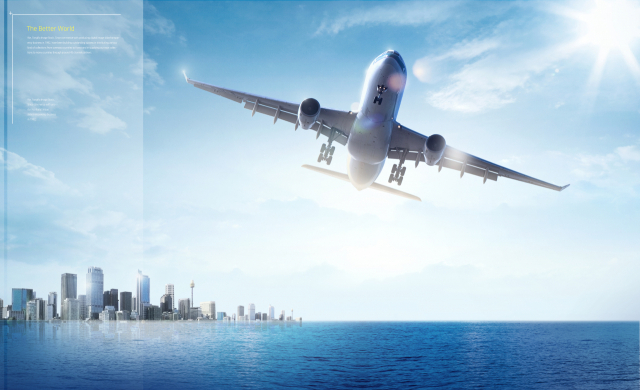

‘코로나19로 하고 싶었지만 하지 못한 여가활동’으로 해외여행, 국내관광이 가장 많이 꼽혔음을 미루어 보아, ‘위드 코로나’ 시대가 들어선다면 관광 붐이 일어날 것이 예상됩니다. 관광 붐이 일어날 시기에 대비해 어느 관광객을 타겟팅 할 것이며, 어느 마케팅 전략을 수립하는가는 ‘위드 코로나’를 넘어서 ‘포스트 코로나’를 맞이할 때까지 영향을 미칠 아주 중요한 요소입니다.

이에 저희는 관광객 타겟팅을 위해 일별 및 성/연령별 분석을 통해 주 타겟층 연령대를 설정하고자 합니다. 이후 타겟팅한 연령대를 분석하여 인사이트를 도출하고, 주 타겟층 특성에 맞춘 효과적 관광산업 전략을 제시하고자 합니다. 

**[자료출처]**
- 이지윤, “코로나19 끝나면 가장 하고 싶은 일 1위는”, 서울경제, 2021.03.17, (https://www.sedaily.com/NewsView/22JUCWND1W)
- 양진원, 파우치 "2022년 봄 코로나 극복, 일상 복귀 가능”, 머니S, 2021.08.24, (https://moneys.mt.co.kr/news/mwView.php?no=2021082413428048921)

In [ ]:
# 그래프 한글 깨짐 해결

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 필요한 모듈 불러오기

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
from PIL import Image
from matplotlib import cm 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. 관광인구 타겟팅

KT의 강릉시, 목포시, 전주시 데이터 분석을 통하여 중심적으로 살펴볼 관광인구를 분석해 보겠습니다.

In [ ]:
# 데이터 불러오기

# 데이터 경로 설정
kt_data = '/content/drive/MyDrive/DACON_플랫폼통합경진대회/KT)플랫폼통합경진대회 데이터/'
gns = '(KT)플랫폼통합경진대회_강릉시_시군구/(KT)플랫폼통합경진대회_강릉시_시군구_'
mps = '(KT)플랫폼통합경진대회_목포시_시군구/(KT)플랫폼통합경진대회_목포시_시군구_'
jjs = '(KT)플랫폼통합경진대회_전주시_시군구/(KT)플랫폼통합경진대회_전주시_시군구_'

# 데이터 파일명
day = '1.일별관광객수.csv'
sex = '2.성연령별관광객수.csv'
rd = '6.거주지기반유입비율.csv'
o_24 = '7.24시간이후이동비율(외지인).csv'

# 분석에 필요한 시 이름 리스트 생성
si = ['강릉시', '목포시', '전주시']

## 1.1. 일별 관광객 수

In [ ]:
# 일별관광객수 : 현지인 / 외지인 / 외국인 관광객 수

gns_day = pd.read_csv(kt_data + gns + day, encoding = 'cp949')
display(gns_day.head(3))

mps_day = pd.read_csv(kt_data + mps + day, encoding = 'cp949')
display(mps_day.head(3))

jjs_day = pd.read_csv(kt_data + jjs + day, encoding = 'cp949')
display(jjs_day.head(3))

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT
0,20190301,강원도,42,강릉시,42150,"136,301","179,498",328
1,20190302,강원도,42,강릉시,42150,"136,497","195,255",345
2,20190303,강원도,42,강릉시,42150,"135,902","121,730",306


,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT
0,20190301,전라남도,46,목포시,46110,"137,714","77,144",227
1,20190302,전라남도,46,목포시,46110,"141,176","80,262",217
2,20190303,전라남도,46,목포시,46110,"141,232","66,154",154


,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,I_CNT,O_CNT,F_CNT
0,20190301,전라북도,45,전주시,45110,"255,924","242,788",726
1,20190302,전라북도,45,전주시,45110,"260,757","250,184",666
2,20190303,전라북도,45,전주시,45110,"265,163","196,746",589


In [ ]:
# 일별 관광객 수 데이터 합치기

s_day = pd.concat([gns_day, mps_day, jjs_day], ignore_index = True)
s_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ETL_YMD  828 non-null    int64 
 1   SIDO_NM  828 non-null    object
 2   SIDO_CD  828 non-null    int64 
 3   SGG_NM   828 non-null    object
 4   SGG_CD   828 non-null    int64 
 5   I_CNT    828 non-null    object
 6   O_CNT    828 non-null    object
 7   F_CNT    828 non-null    object
dtypes: int64(3), object(5)
memory usage: 51.9+ KB


In [ ]:
# 관광객 수 데이터 타입 int 로 변환

# 데이터 확인
for column in ['I_CNT', 'O_CNT', 'F_CNT'] :
    print(s_day[column].unique())

['136,301' '136,497' '135,902' '151,518' '148,904' '148,368' '148,533'
 '151,946' '141,271' '132,765' '149,030' '148,607' '149,345' '149,205'
 '149,810' '139,163' '135,247' '148,509' '150,013' '149,677' '148,568'
 '149,405' '138,526' '135,607' '148,138' '149,709' '147,637' '145,005'
 '149,632' '138,733' '134,103' '168,497' '169,246' '170,471' '165,561'
 '167,331' '154,539' '153,724' '167,066' '166,054' '163,282' '168,263'
 '167,678' '155,453' '147,819' '167,671' '168,332' '169,460' '166,673'
 '166,918' '156,628' '151,718' '165,256' '164,556' '164,976' '161,815'
 '156,380' '149,863' '144,137' '159,233' '162,718' '162,095' '160,849'
 '159,894' '143,175' '137,704' '142,341' '159,229' '161,329' '157,500'
 '158,144' '145,775' '141,607' '155,551' '156,293' '157,259' '155,113'
 '154,203' '142,236' '139,416' '153,548' '154,280' '154,707' '154,333'
 '152,506' '140,623' '138,219' '150,455' '152,411' '154,028' '152,366'
 '151,456' '124,313' '139,776' '140,546' '141,803' '143,654' '146,643'
 '139,

In [ ]:
# 'F_CNT' 열에 숫자 값이 아닌 '-' 값이 있음을 확인
# 데이터 정의서에 따르면 Null값이 존재하지 않음
# 따라서, '-' 를 0 으로 변환

s_day['F_CNT'] = s_day['F_CNT'].astype(str).str.replace(' - ', '0')

In [ ]:
#관광객 열 ','제거 및 데이터 타입 int 로 변환

for column in ['I_CNT', 'O_CNT', 'F_CNT'] :
    s_day[column] = s_day[column].map(lambda x : int(str(x).replace(',', '')))

In [ ]:
# 필요 열 추가 및 변경 : 연월('ETL_YM')

s_day['ETL_YM'] = (s_day['ETL_YMD'] // 100).astype(str)

In [ ]:
# 연월별 관광객 수 : s_day_month

s_day_month = pd.pivot_table(s_day, index = ['ETL_YM', 'SGG_NM'], values = ['I_CNT', 'O_CNT', 'F_CNT'], aggfunc = sum).fillna(0).reset_index().set_index('ETL_YM')
s_day_month

,SGG_NM,F_CNT,I_CNT,O_CNT
ETL_YM,,,,
201903,강릉시,8194,4485674,2735365
201903,목포시,6065,4537623,1977580
201903,전주시,17002,8560866,6415968
201904,강릉시,13786,4861318,2065094
201904,목포시,5160,4492765,1831022
201904,전주시,19083,8870089,5145563
201905,강릉시,9446,4698645,2349320
201905,목포시,5292,4600327,1914836
201905,전주시,14296,9146615,5691142


In [ ]:
# 코로나 이전과 이후로 데이터 분리

s_day_month_before = s_day_month.loc[['201903','201904','201905']]
s_day_month_after = s_day_month.loc[['202003','202004','202005', '202103', '202104', '202105']]

In [ ]:
# 시각화 위한 축 범위 설정 함수 만들기

def lim(data_max) :
    
    max_log = 10 ** (round(np.log10(data_max)) -1)
    lim = round(data_max, -(len(str(data_max))-1))

    return (data_max // max_log + 2) * max_log

In [ ]:
# 현지인, 외지인, 외국인 관광객 구분 위한 색 설정

cnt_colors = sns.color_palette("pastel", 3)

In [ ]:
# 시별 월평균 관광객 수 : si_cnt

si_cnt_before = s_day_month_before.groupby('SGG_NM')[['I_CNT', 'O_CNT', 'F_CNT']].mean()
si_cnt_after = s_day_month_after.groupby('SGG_NM')[['I_CNT', 'O_CNT', 'F_CNT']].mean()
display(si_cnt_before)
display(si_cnt_after)

,I_CNT,O_CNT,F_CNT
SGG_NM,,,
강릉시,4.681879e+06,2.383260e+06,10475.333333
목포시,4.543572e+06,1.907813e+06,5505.666667
전주시,8.859190e+06,5.750891e+06,16793.666667


,I_CNT,O_CNT,F_CNT
SGG_NM,,,
강릉시,4.939044e+06,2.319623e+06,1176.000000
목포시,4.651433e+06,1.711116e+06,1149.333333
전주시,1.036853e+07,4.911612e+06,2765.000000


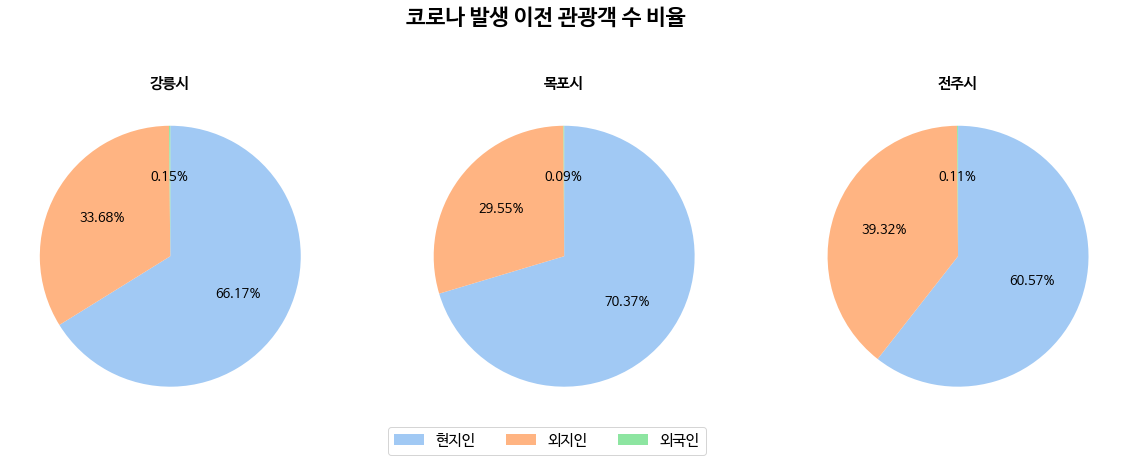

In [ ]:
# 코로나 이전 관광객 수 비율 구하기

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
  axes[si.index(si_name)].pie(si_cnt_before.loc[si_name], colors = cnt_colors, autopct = '%1.2f%%', textprops = {'fontsize' : 13}, startangle = 90, counterclock = False)
  axes[si.index(si_name)].set_title(si_name, fontsize = 15, weight = 'bold')

plt.suptitle('코로나 발생 이전 관광객 수 비율', size=22, weight='bold', y = 1.08)
plt.legend(bbox_to_anchor = (-0.25,0), prop = {'size' : 15}, ncol = 3, labels = ['현지인', '외지인' , '외국인'])
plt.show()

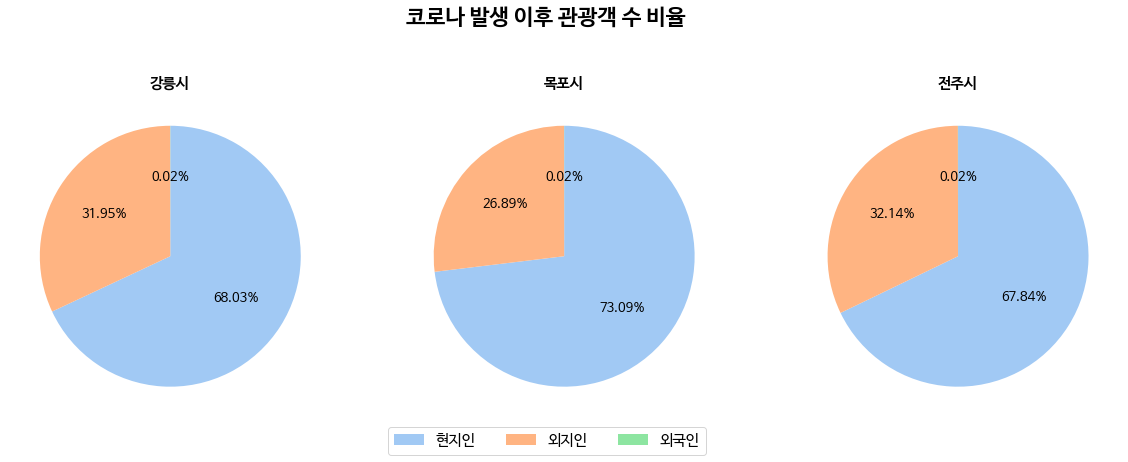

In [ ]:
# 코로나 이후 관광객 수 비율 구하기

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
  axes[si.index(si_name)].pie(si_cnt_after.loc[si_name], colors = cnt_colors, autopct = '%1.2f%%',  textprops = {'fontsize' : 13}, startangle = 90, counterclock = False)
  axes[si.index(si_name)].set_title(si_name, fontsize = 15, weight = 'bold')

plt.suptitle('코로나 발생 이후 관광객 수 비율', size=22, weight='bold', y = 1.08)
plt.legend(bbox_to_anchor = (-0.25,0), prop = {'size' : 15}, ncol = 3, labels = ['현지인', '외지인' , '외국인'])
plt.show()

**<font color='blue'> 일별 관광객 수 중간 분석 결과</font>**

외국인 관광객의 비중이 거의 0%에 가까우며 코로나 상황으로 인해 외국인 방문이 어려울 것으로 판단해 현지인과 외지인에 초점을 맞춰 분석을 진행하였습니다.

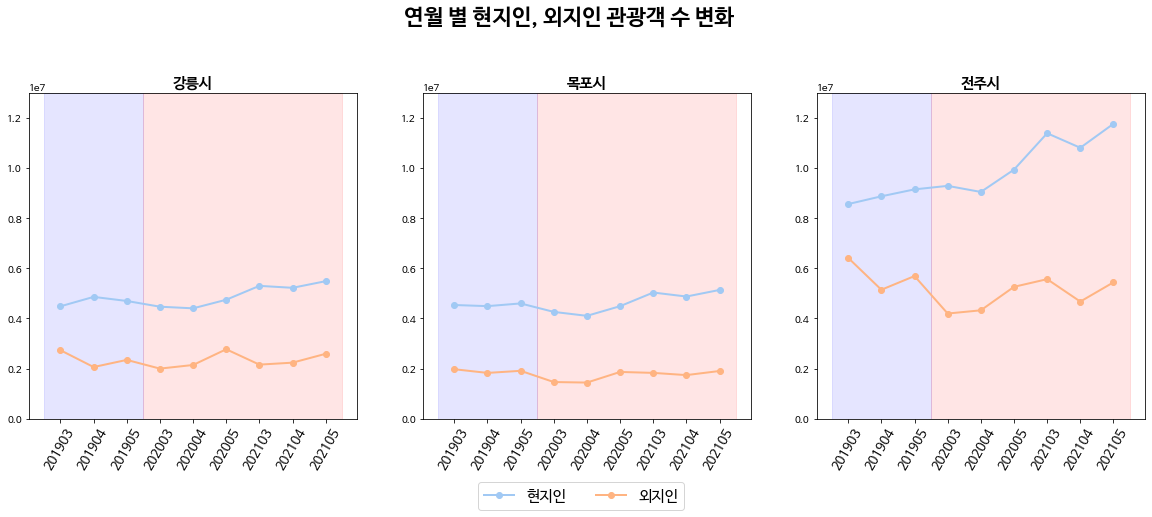

In [ ]:
# 현지인 / 외지인 관광객 수 확인

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
    s_day_month[s_day_month['SGG_NM'] == si_name].iloc[:, 2:].plot(linewidth = 2, marker = 'o', ax = axes[si.index(si_name)], color = cnt_colors)
    axes[si.index(si_name)].set_title(si_name, size = 15, weight = 'bold')
    axes[si.index(si_name)].set_ylim([0, lim(max(s_day_month['I_CNT']))])
    axes[si.index(si_name)].set_xticklabels(['', '201903','201904','201905','202003','202004','202005','202103','202104','202105'], size = 13, rotation = 60)
    axes[si.index(si_name)].set_xlabel('')
    # 코로나 전후 체크
    axes[si.index(si_name)].axvspan(-0.5, 2.5, color = 'blue', alpha = 0.1)
    axes[si.index(si_name)].axvspan(2.5, 8.5, color = 'red', alpha = 0.1)

axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.suptitle('연월 별 현지인, 외지인 관광객 수 변화', size=22, weight='bold', y = 1.08)
plt.legend(bbox_to_anchor = (-0.38,-0.17), prop = {'size' : 15}, ncol = 2, labels = ['현지인', '외지인'])
plt.show()

**<font color='blue'> 일별 관광객 수 분석 결과</font>**

관광객 수는 전주에서 높게 나타나고, 강릉과 목포는 비슷한 수준을 보입니다. 현지인과 외지인 관광객 수를 살펴보면, 현지인 관광객 수가 항상 높게 나타나며 특히 전주의 경우 코로나 이후 현지인 관광객 수가 크게 늘어났음을 확인할 수 있습니다. 외지인 관광객의 경우, 코로나 이후 강릉, 목포에서 비슷한 추이를 보이고 전주에서는 감소하였습니다.

보다 상세한 현지인과 외지인 관광객 타겟팅을 위하여 이들의 성연령별 데이터 추가 분석이 필요할 것으로 보입니다.

## 1.2. 성연령별 관광객 수

코로나 이전과 이후 현지인과 외지인의 관광객 비율 비교

In [ ]:
# 성연령별관광객수 : 현지인 / 외지인 성연령별 관광객 수

gns_sex = pd.read_csv(kt_data + gns + sex, encoding = 'cp949')
display(gns_sex.head(3))

mps_sex = pd.read_csv(kt_data + mps + sex, encoding = 'cp949')
display(mps_sex.head(3))

jjs_sex = pd.read_csv(kt_data + jjs + sex, encoding = 'cp949')
display(jjs_sex.head(3))

,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,SEX_DIV_CD,AGE_DIV_CD,I_CNT,O_CNT
0,20190301,강원도,42,강릉시,42150,F,A0009,722,"1,163"
1,20190301,강원도,42,강릉시,42150,F,A1019,"5,676","8,227"
2,20190301,강원도,42,강릉시,42150,F,A2029,"9,425","26,287"


,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,SEX_DIV_CD,AGE_DIV_CD,I_CNT,O_CNT
0,20190301,전라남도,46,목포시,46110,F,A0009,"1,057",772
1,20190301,전라남도,46,목포시,46110,F,A1019,"6,823","3,324"
2,20190301,전라남도,46,목포시,46110,F,A2029,"10,249","5,935"


,ETL_YMD,SIDO_NM,SIDO_CD,SGG_NM,SGG_CD,SEX_DIV_CD,AGE_DIV_CD,I_CNT,O_CNT
0,20190301,전라북도,45,전주시,45110,F,A0009,886,"2,048"
1,20190301,전라북도,45,전주시,45110,F,A1019,"12,107","12,993"
2,20190301,전라북도,45,전주시,45110,F,A2029,"24,354","31,598"


In [ ]:
# 데이터 합치기

s_sex = pd.concat([gns_sex, mps_sex, jjs_sex], ignore_index = True)
s_sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13248 entries, 0 to 13247
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ETL_YMD     13248 non-null  int64 
 1   SIDO_NM     13248 non-null  object
 2   SIDO_CD     13248 non-null  int64 
 3   SGG_NM      13248 non-null  object
 4   SGG_CD      13248 non-null  int64 
 5   SEX_DIV_CD  13248 non-null  object
 6   AGE_DIV_CD  13248 non-null  object
 7   I_CNT       13248 non-null  object
 8   O_CNT       13248 non-null  object
dtypes: int64(3), object(6)
memory usage: 931.6+ KB


In [ ]:
# 관광객 수 데이터 타입 int로 변환

s_sex['I_CNT'] = s_sex['I_CNT'].map(lambda x : int(str(x).replace(',','')))
s_sex['O_CNT'] = s_sex['O_CNT'].map(lambda x : int(str(x).replace(',','')))

In [ ]:
# 필요 열 추가 및 변경 : 연월('ETL_YM')

s_sex['ETL_YM'] = (s_sex['ETL_YMD'] // 100).astype(str)

In [ ]:
# 연령/성별 관광객 수 합산 : s_sex_age

s_sex_age = pd.pivot_table(s_sex, index = ['SGG_NM', 'AGE_DIV_CD'], columns = 'SEX_DIV_CD', values = ['I_CNT', 'O_CNT'], aggfunc = sum).fillna(0).reset_index().set_index('AGE_DIV_CD')
s_sex_age

SGG_NM    I_CNT             O_CNT         
SEX_DIV_CD               F        M        F        M
AGE_DIV_CD                                           
A0009         강릉시   301289   265112   153577   151974
A1019         강릉시  1919445  2080300   688072   797074
A2029         강릉시  3015573  3712298  2650609  2842024
A3039         강릉시  2286809  2705218  1685211  1971350
A4049         강릉시  3660092  3998166  1466704  1930263
A5059         강릉시  4863549  4991942  1709943  1932006
A6069         강릉시  3232503  3583683   978951  1191363
A7000         강릉시  1536550  1527369   467302   451070
A0009         목포시   441739   395343   210600   207236
A1019         목포시  2151069  2207873   584314   712922
A2029         목포시  2758122  2782799  1289416  1777449
A3039         목포시  2720978  3001683   987600  1548913
A4049         목포시  4197790  4089043  1116813  1772540
A5059         목포시  4619204  4204638  1288237  1801984
A6069         목포시  2684077  2780578   794451  1013299
A7000         목포시  1252254  1252123   458687   425696
A0009         전주시   624987   471878   435673   386528
A1019         전주시  4430440  4480414  1989517  2193619
A2029         전주시  7742536  8469629  5273520  6211430
A3039         전주시  5896605  6158749  3264402  4229255
A4049         전주시  8080847  7216578  3208803  4336940
A5059         전주시  9788356  8587408  3617308  4376307
A6069         전주시  5597574  5611804  2132885  2534199
A7000         전주시  2865641  2765299  1355434  1176531

In [ ]:
# 연령/연월별 관광객 수 합산 : s_age_month

s_age_month = pd.pivot_table(s_sex, index = ['SGG_NM', 'AGE_DIV_CD'], columns='ETL_YM', values = ['I_CNT', 'O_CNT'], aggfunc = sum).fillna(0).reset_index().set_index('AGE_DIV_CD')
s_age_month

SGG_NM    I_CNT           ...    O_CNT                  
ETL_YM              201903   201904  ...   202103   202104   202105
AGE_DIV_CD                           ...                           
A0009         강릉시    52099    67842  ...    45348    28039    31400
A1019         강릉시   504867   545745  ...   176710    86933   150354
A2029         강릉시   657090   821332  ...   635722   567728   664797
A3039         강릉시   527549   567247  ...   338316   420325   487161
A4049         강릉시   837290   856123  ...   297359   356433   431135
A5059         강릉시  1031275  1063933  ...   346347   409771   443955
A6069         강릉시   608575   648829  ...   228136   264955   273242
A7000         강릉시   266927   290284  ...    93730   105525   111049
A0009         목포시    78529    91724  ...    83121    26371    30439
A1019         목포시   593539   481325  ...   158435   136858   129666
A2029         목포시   595585   613167  ...   366028   370617   401204
A3039         목포시   665542   685874  ...   266642   261434   306969
A4049         목포시   922666   928845  ...   308060   288303   337996
A5059         목포시   945281   949821  ...   331229   339466   361670
A6069         목포시   517197   520015  ...   212560   219954   229197
A7000         목포시   219276   221993  ...   106031   101041   110534
A0009         전주시    71179    79314  ...   141111    62635    74943
A1019         전주시  1010593   959399  ...   686921   300673   389031
A2029         전주시  1637523  1816504  ...  1512539  1164534  1385961
A3039         전주시  1189176  1207864  ...   797797   755989   927733
A4049         전주시  1543374  1560035  ...   757553   717894   844663
A5059         전주시  1743006  1782553  ...   833555   817109   899812
A6069         전주시   942723  1005325  ...   531753   552286   585366
A7000         전주시   423283   459098  ...   306488   303327   333945

[24 rows x 19 columns]

### 1.2.1. 현지인

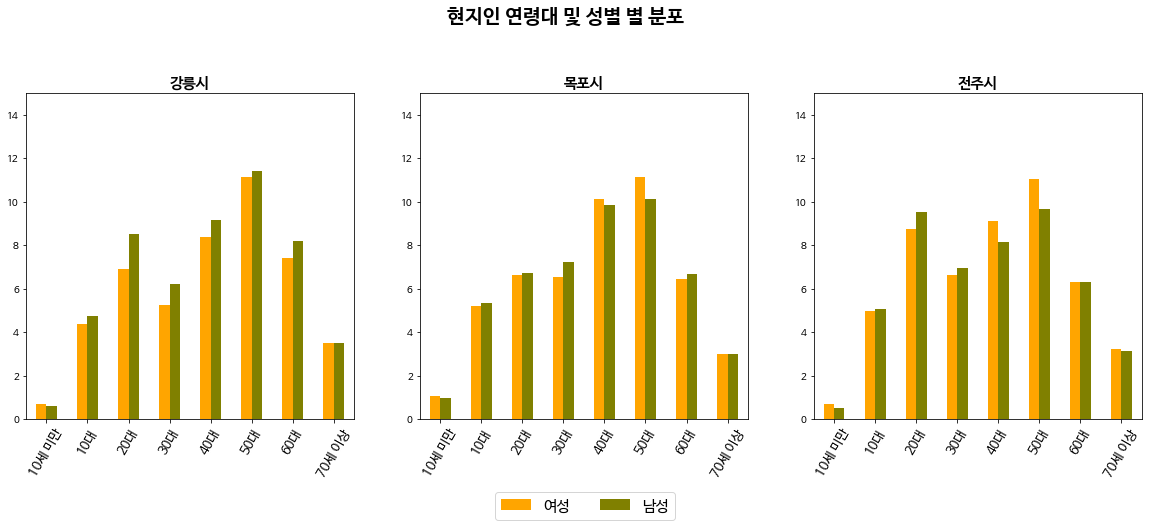

In [ ]:
# 현지인 연령 및 성별 (비율)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))
colors_sex=['orange','olive']

for si_name in si :
    df =  s_sex_age[s_sex_age['SGG_NM'] == si_name]['I_CNT']
    (100*(df / sum(df['F'] +df['M']))).round(2).plot.bar(ax = axes[si.index(si_name)], color=colors_sex)

    axes[si.index(si_name)].set_title(si_name, size=15, weight='bold')
    axes[si.index(si_name)].set_xticklabels(['10세 미만','10대','20대','30대','40대','50대','60대','70세 이상'], size=13, rotation = 60)
    axes[si.index(si_name)].set_xlabel('')
    axes[si.index(si_name)].set_ylim([0, 15])

axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.suptitle('현지인 연령대 및 성별 별 분포', size=20, weight='bold', y=1.08)
plt.legend(bbox_to_anchor = (-0.4,-0.2), prop = {'size' : 15}, ncol = 2, labels=['여성','남성'])
plt.show()

In [ ]:
# 연령대 구분 위한 색 설정

age_colors = sns.set_palette('colorblind', 8)

#age_colors hex코드
age_colors_lst = ['#0173b2', '#de8f05', '#029e73', '#d55e00', '#cc78bc', '#ca9161', '#fbafe4', '#949494']

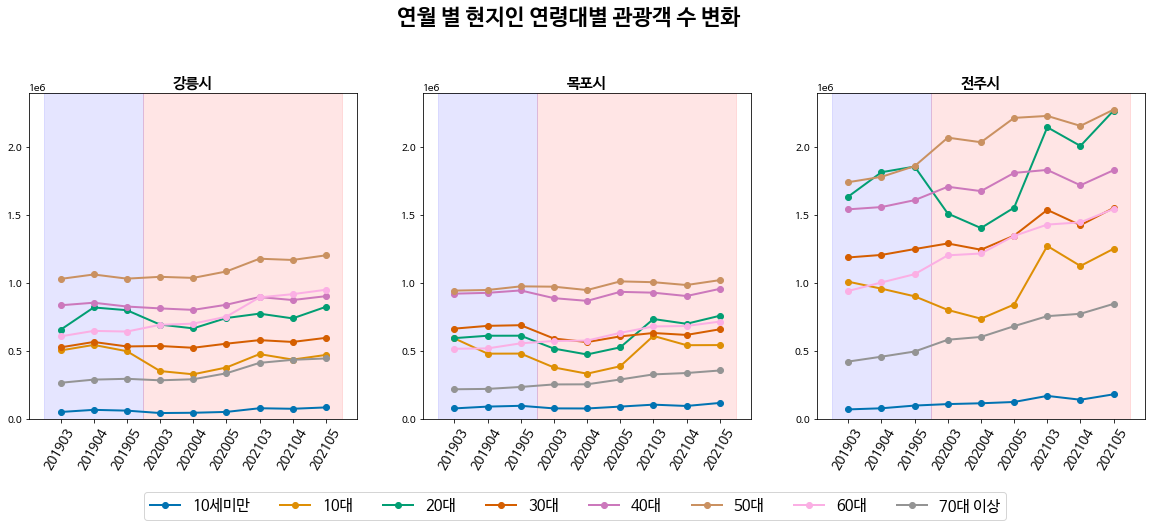

In [ ]:
# 현지인 연령별 월별 관광객 수 변화

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
    s_age_month[s_age_month['SGG_NM'] == si_name]['I_CNT'].T.plot(linewidth = 2, marker = 'o', color = age_colors, ax = axes[si.index(si_name)])
    axes[si.index(si_name)].set_title(si_name, size = 15, weight = 'bold')
    axes[si.index(si_name)].set_xticklabels(['', '201903','201904','201905','202003','202004','202005','202103','202104','202105'], size = 13, rotation = 60)
    axes[si.index(si_name)].set_xlabel(None)
    axes[si.index(si_name)].set_ylim([0, lim(max(s_age_month['I_CNT'].max()))])
    
    # 코로나 전후 체크
    axes[si.index(si_name)].axvspan(-0.5, 2.5, color = 'blue', alpha = 0.1)
    axes[si.index(si_name)].axvspan(2.5, 8.5, color = 'red', alpha = 0.1)

axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.suptitle('연월 별 현지인 연령대별 관광객 수 변화', size=22, weight='bold', y = 1.08)
plt.legend(bbox_to_anchor = (0.6,-0.2), prop = {'size' : 15}, ncol = 8, labels = ['10세미만','10대','20대','30대','40대','50대','60대','70대 이상'])

plt.show()

### 1.2.2. 외지인

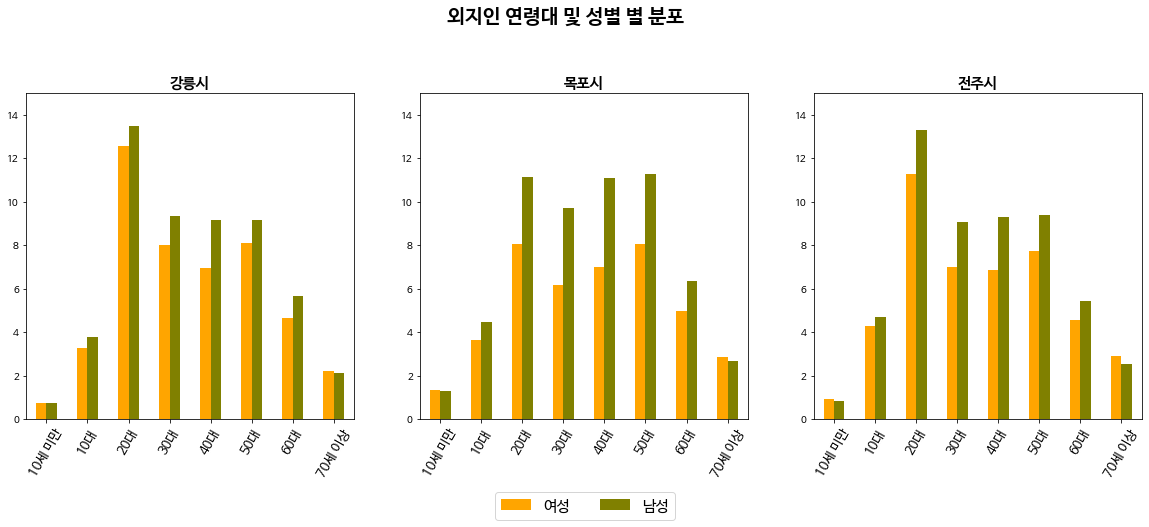

In [ ]:
# 외지인 연령 및 성별 (비율)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
    df =  s_sex_age[s_sex_age['SGG_NM'] == si_name]['O_CNT']
    (100*(df / sum(df['F'] +df['M']))).round(2).plot.bar(ax = axes[si.index(si_name)], color=colors_sex)
    axes[si.index(si_name)].set_title(si_name, size=15, weight='bold')
    axes[si.index(si_name)].set_xticklabels(['10세 미만','10대','20대','30대','40대','50대','60대','70세 이상'], size=13, rotation = 60)
    axes[si.index(si_name)].set_xlabel('')
    axes[si.index(si_name)].set_ylim([0, 15])

axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.suptitle('외지인 연령대 및 성별 별 분포', size=20, weight='bold', y=1.08)
plt.legend(bbox_to_anchor = (-0.4,-0.2), prop = {'size' : 15}, ncol = 2, labels=['여성','남성'])

plt.show()

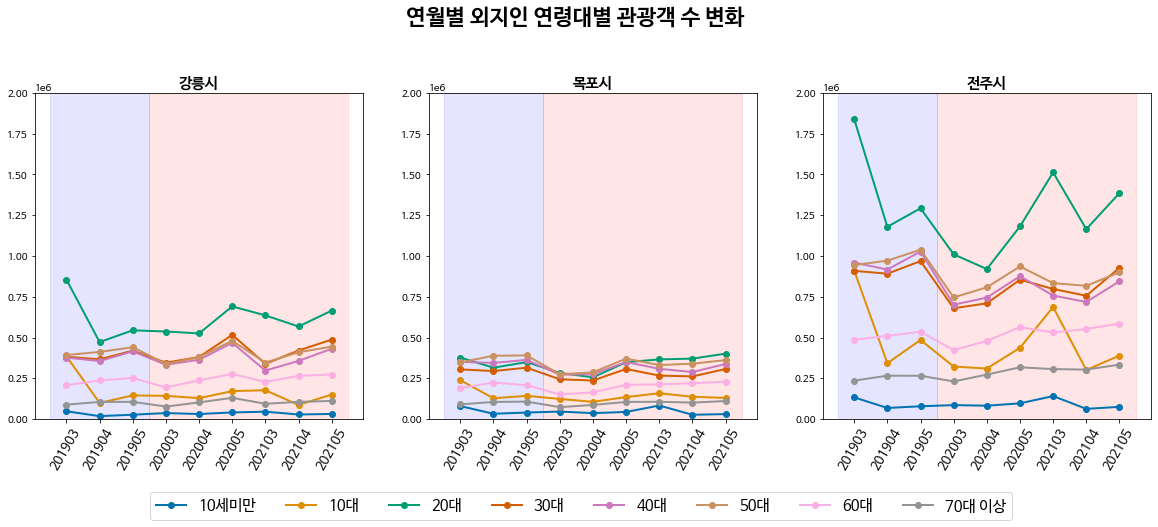

In [ ]:
# 외지인 연령별 월별 방문 비율 변화

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

for si_name in si :
    s_age_month[s_age_month['SGG_NM'] == si_name]['O_CNT'].T.plot(linewidth = 2, marker = 'o', color = age_colors, ax = axes[si.index(si_name)])
    axes[si.index(si_name)].set_title(si_name, size = 15, weight = 'bold')
    axes[si.index(si_name)].set_xticklabels(['', '201903','201904','201905','202003','202004','202005','202103','202104','202105'], size = 13, rotation = 60)
    axes[si.index(si_name)].set_xlabel(None)
    axes[si.index(si_name)].set_ylim([0, lim(max(s_age_month['O_CNT'].max()))])
    
    # 코로나 전후 체크
    axes[si.index(si_name)].axvspan(-0.5, 2.5, color = 'blue', alpha = 0.1)
    axes[si.index(si_name)].axvspan(2.5, 8.5, color = 'red', alpha = 0.1)

axes[0].get_legend().remove()
axes[1].get_legend().remove()

plt.suptitle('연월별 외지인 연령대별 관광객 수 변화', size=22, weight='bold', y = 1.08)
plt.legend(bbox_to_anchor = (0.6,-0.2), prop = {'size' : 15}, ncol = 8, labels = ['10세미만','10대','20대','30대','40대','50대','60대','70대 이상'])

plt.show()

**<font color='#013ADF'> 성연령별 관광객 수 데이터 분석 결과</font>**

연령대 별 관광객 수 데이터를 분석한 그래프를 살펴보았을 때 현지인과 외지인 관광객을 통틀어 20대, 40대, 50대 관광객들이 많이 방문한 것을 확인할 수 있습니다. 또한 현지인 관광객의 연령대 분포에서는 특히 50대가 모든 시에서 가장 많은 관광객 수를 기록하였는데, 현지인 관광객이 외지인 관광객보다 높은 비중을 차지한다는 점을 고려할 때 이들이 코로나 이후 관광의 중심이 될 것이라고 생각했습니다. 또한 50대의 뒤를 이어 20, 30, 40대 역시 높은 관광 비율을 기록하였지만 메인 타겟 고객인 50대와 관련한 전략 실행의 편리성, 코로나 이후 증가할 관광객 연령대 예측, 증가하는 시니어 세대들의 소비 습관 등 여러 조건을 고려해 보았을 때 저희는 메인 타겟 고객을 40\~50대로 선정하여 분석을 진행하였습니다.

40~50대에 주목해야 하는 더 자세한 이유는 다음 장에서 다루도록 하겠습니다.

# 2. 40~50대에 주목해야하는 이유
- KORAIL, 출국인원, 우리나라 총 인구수 데이터 활용

## 2.1. KORAIL 데이터에 근거하여

In [ ]:
#고객 특성별 이용정보 데이터 불러오기

d_2019 = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2019.csv')
d_2020 = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2020.csv')
d_2021 = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/KORAIL)플랫폼통합경진대회 데이터/고객 특성별 철도서비스 이용정보(강릉,목포,전주)_2021.csv')
display(d_2019)
display(d_2020)
display(d_2021)

,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,12
1,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4
2,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
3,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900276,여천,D,1040,2,무궁화호,3
4,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644268,20190531,금,회원,23.0,M,50~59세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2
644269,20190531,금,회원,23.0,M,60~64세,F,3900025,용산,3900242,목포,D,1563,2,무궁화호,2
644270,20190531,금,회원,23.0,M,60~64세,F,3900130,양평,3900587,강릉,D,1963,2,무궁화호,1
644271,20190531,금,회원,23.0,M,65세이상,A,3900030,영등포,3900242,목포,D,1563,2,무궁화호,1


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20200301,일,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,3
1,20200301,일,비회원,0.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,2
2,20200301,일,비회원,2.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,1
3,20200301,일,비회원,2.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
4,20200301,일,비회원,4.0,NaN,기타,NaN,3900587,강릉,3900572,도계,U,2120,2,무궁화호,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429829,20200531,일,회원,23.0,M,20~29세,F,3900280,오송,3900242,목포,D,1773,0,KTX,2
429830,20200531,일,회원,23.0,M,30~39세,F,3900211,익산,3900242,목포,D,1773,0,KTX,1
429831,20200531,일,회원,23.0,M,30~39세,F,3900280,오송,3900242,목포,D,1773,0,KTX,1
429832,20200531,일,회원,23.0,M,30~39세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,2
1,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,4
2,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900271,순천,D,1040,2,무궁화호,1
3,20210301,월,비회원,2.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
4,20210301,월,비회원,5.0,NaN,기타,NaN,3900242,목포,3900229,광주송정,U,1773,7,KTX-산천,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558068,20210531,월,회원,23.0,M,20~29세,F,3900195,서대전,3900248,전주,D,1040,2,무궁화호,1
558069,20210531,월,회원,23.0,M,20~29세,F,3900259,남원,3900248,전주,U,943,2,무궁화호,1
558070,20210531,월,회원,23.0,M,30~39세,F,3900195,서대전,3900248,전주,D,1040,2,무궁화호,2
558071,20210531,월,회원,23.0,M,40~49세,F,3900271,순천,3900248,전주,U,943,2,무궁화호,1


In [ ]:
#출퇴근 데이터 인덱스 추출

commute_19 = d_2019.query('인원==1 and 구분=="회원" and 운행요일 in ["월","화","수","목","금"]')\
[['출발시간대','성별','연령대','고객등급_현재','출발역명','도착역명','상하행구분','노선', '역무열차종코드']]
idx_19 = commute_19[commute_19.duplicated()].index

commute_20 = d_2020.query('인원==1 and 구분=="회원" and 운행요일 in ["월","화","수","목","금"]')\
[['출발시간대','성별','연령대','고객등급_현재','출발역명','도착역명','상하행구분','노선', '역무열차종코드']]
idx_20 = commute_20[commute_20.duplicated()].index

commute_21 = d_2021.query('인원==1 and 구분=="회원" and 운행요일 in ["월","화","수","목","금"]')\
[['출발시간대','성별','연령대','고객등급_현재','출발역명','도착역명','상하행구분','노선', '역무열차종코드']]
idx_21 = commute_21[commute_21.duplicated()].index

In [ ]:
#출퇴근 데이터 드롭 - 진짜 여행객 데이터만 남겨두기

pax_2019 = d_2019.drop(index=idx_19)
pax_2020 = d_2020.drop(index=idx_20)
pax_2021 = d_2021.drop(index=idx_21)
display(pax_2019)
display(pax_2020)
display(pax_2021)

,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,12
1,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4
2,20190301,금,비회원,0.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
3,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900276,여천,D,1040,2,무궁화호,3
4,20190301,금,비회원,2.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644268,20190531,금,회원,23.0,M,50~59세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2
644269,20190531,금,회원,23.0,M,60~64세,F,3900025,용산,3900242,목포,D,1563,2,무궁화호,2
644270,20190531,금,회원,23.0,M,60~64세,F,3900130,양평,3900587,강릉,D,1963,2,무궁화호,1
644271,20190531,금,회원,23.0,M,65세이상,A,3900030,영등포,3900242,목포,D,1563,2,무궁화호,1


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20200301,일,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,3
1,20200301,일,비회원,0.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,2
2,20200301,일,비회원,2.0,NaN,기타,NaN,3900248,전주,3900259,남원,D,1040,2,무궁화호,1
3,20200301,일,비회원,2.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
4,20200301,일,비회원,4.0,NaN,기타,NaN,3900587,강릉,3900572,도계,U,2120,2,무궁화호,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429829,20200531,일,회원,23.0,M,20~29세,F,3900280,오송,3900242,목포,D,1773,0,KTX,2
429830,20200531,일,회원,23.0,M,30~39세,F,3900211,익산,3900242,목포,D,1773,0,KTX,1
429831,20200531,일,회원,23.0,M,30~39세,F,3900280,오송,3900242,목포,D,1773,0,KTX,1
429832,20200531,일,회원,23.0,M,30~39세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
0,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,2
1,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900211,익산,U,943,2,무궁화호,4
2,20210301,월,비회원,0.0,NaN,기타,NaN,3900248,전주,3900271,순천,D,1040,2,무궁화호,1
3,20210301,월,비회원,2.0,NaN,기타,NaN,3900248,전주,3900279,여수엑스포,D,1040,2,무궁화호,1
4,20210301,월,비회원,5.0,NaN,기타,NaN,3900242,목포,3900229,광주송정,U,1773,7,KTX-산천,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558047,20210531,월,회원,22.0,M,40~49세,F,3900224,장성,3900242,목포,D,1563,8,ITX-새마을,1
558048,20210531,월,회원,22.0,M,40~49세,F,3900883,광명,3900248,전주,D,1786,7,KTX-산천,2
558057,20210531,월,회원,22.0,M,60~64세,D,3900211,익산,3900248,전주,D,1040,2,무궁화호,2
558065,20210531,월,회원,23.0,F,50~59세,F,3900061,천안,3900248,전주,D,1040,2,무궁화호,1


In [ ]:
#도착역이 강릉, 목포, 전주인 것만 추출

pax_2019_gmj = pax_2019.query('도착역명 in ["강릉","목포","전주"]')
pax_2020_gmj = pax_2020.query('도착역명 in ["강릉","목포","전주"]')
pax_2021_gmj = pax_2021.query('도착역명 in ["강릉","목포","전주"]')

display(pax_2019_gmj)
display(pax_2020_gmj)
display(pax_2021_gmj)

,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
105231,20190301,금,비회원,0.0,NaN,기타,NaN,3900066,조치원,3900242,목포,D,1563,2,무궁화호,1
105232,20190301,금,비회원,0.0,NaN,기타,NaN,3900085,김천,3900587,강릉,U,1967,2,무궁화호,1
105233,20190301,금,비회원,0.0,NaN,기타,NaN,3900095,대구,3900587,강릉,U,1967,2,무궁화호,1
105234,20190301,금,비회원,0.0,NaN,기타,NaN,3900142,구원주,3900587,강릉,D,1963,2,무궁화호,2
105235,20190301,금,비회원,0.0,NaN,기타,NaN,3900195,서대전,3900248,전주,D,1040,2,무궁화호,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644268,20190531,금,회원,23.0,M,50~59세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2
644269,20190531,금,회원,23.0,M,60~64세,F,3900025,용산,3900242,목포,D,1563,2,무궁화호,2
644270,20190531,금,회원,23.0,M,60~64세,F,3900130,양평,3900587,강릉,D,1963,2,무궁화호,1
644271,20190531,금,회원,23.0,M,65세이상,A,3900030,영등포,3900242,목포,D,1563,2,무궁화호,1


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
58176,20200301,일,비회원,0.0,NaN,기타,NaN,3900204,논산,3900248,전주,D,1040,2,무궁화호,1
58177,20200301,일,비회원,0.0,NaN,기타,NaN,3900211,익산,3900248,전주,D,1040,2,무궁화호,7
58178,20200301,일,비회원,0.0,NaN,기타,NaN,3900229,광주송정,3900242,목포,D,1773,0,KTX,1
58179,20200301,일,비회원,5.0,NaN,기타,NaN,3900023,서울,3900587,강릉,D,2134,10,KTX-호남,4
58180,20200301,일,비회원,5.0,NaN,기타,NaN,3900025,용산,3900242,목포,D,1773,7,KTX-산천,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429829,20200531,일,회원,23.0,M,20~29세,F,3900280,오송,3900242,목포,D,1773,0,KTX,2
429830,20200531,일,회원,23.0,M,30~39세,F,3900211,익산,3900242,목포,D,1773,0,KTX,1
429831,20200531,일,회원,23.0,M,30~39세,F,3900280,오송,3900242,목포,D,1773,0,KTX,1
429832,20200531,일,회원,23.0,M,30~39세,F,3900884,천안아산,3900242,목포,D,1773,0,KTX,2


,운행일자,운행요일,구분,출발시간대,성별,연령대,고객등급_현재,출발역코드,출발역명,도착역코드,도착역명,상하행구분,노선,역무열차종코드,역무열차종,인원
89796,20210301,월,비회원,0.0,NaN,기타,NaN,3900195,서대전,3900248,전주,D,1040,2,무궁화호,2
89797,20210301,월,비회원,0.0,NaN,기타,NaN,3900204,논산,3900248,전주,D,1040,2,무궁화호,1
89798,20210301,월,비회원,0.0,NaN,기타,NaN,3900211,익산,3900248,전주,D,1040,2,무궁화호,2
89799,20210301,월,비회원,0.0,NaN,기타,NaN,3900229,광주송정,3900242,목포,D,1773,0,KTX,4
89800,20210301,월,비회원,0.0,NaN,기타,NaN,3900231,나주,3900242,목포,D,1773,0,KTX,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558047,20210531,월,회원,22.0,M,40~49세,F,3900224,장성,3900242,목포,D,1563,8,ITX-새마을,1
558048,20210531,월,회원,22.0,M,40~49세,F,3900883,광명,3900248,전주,D,1786,7,KTX-산천,2
558057,20210531,월,회원,22.0,M,60~64세,D,3900211,익산,3900248,전주,D,1040,2,무궁화호,2
558065,20210531,월,회원,23.0,F,50~59세,F,3900061,천안,3900248,전주,D,1040,2,무궁화호,1


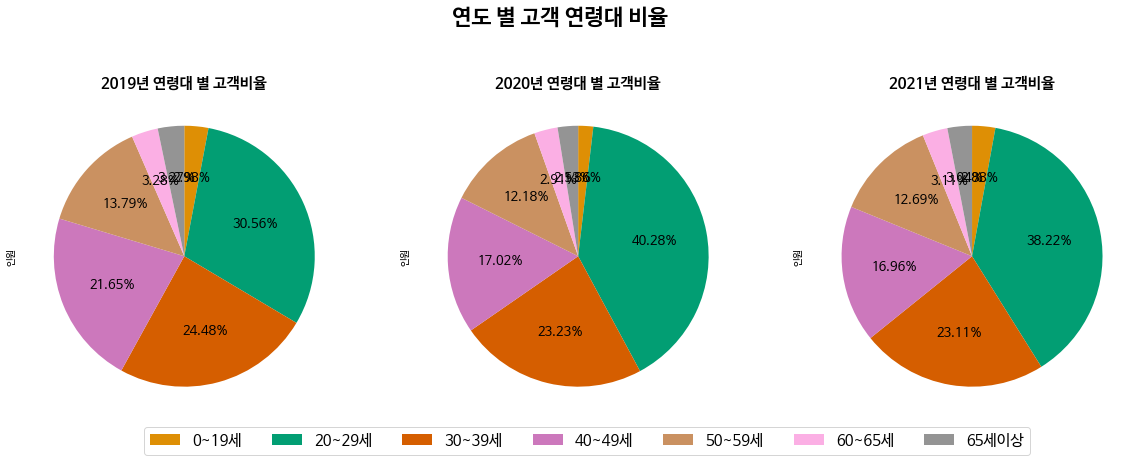

In [ ]:
#연도에 따른 연령대 별 고객비율 시각화

fig, axes = plt.subplots(1,3,figsize=(20,6))

pax_2019_gmj.query('연령대!="기타"').groupby('연령대').인원.sum().plot.pie(ax=axes[0], colors=age_colors_lst[1:], autopct = '%1.2f%%',  textprops = {'fontsize' : 13}, startangle = 90, counterclock = False, labels=None)
axes[0].set_title('2019년 연령대 별 고객비율', size=15, weight='bold')

pax_2020_gmj.query('연령대!="기타"').groupby('연령대').인원.sum().plot.pie(ax=axes[1], colors=age_colors_lst[1:], autopct = '%1.2f%%',  textprops = {'fontsize' : 13}, startangle = 90, counterclock = False, labels=None)
axes[1].set_title('2020년 연령대 별 고객비율',size=15, weight='bold')

pax_2021_gmj.query('연령대!="기타"').groupby('연령대').인원.sum().plot.pie(ax=axes[2], colors=age_colors_lst[1:], autopct = '%1.2f%%',  textprops = {'fontsize' : 13}, startangle = 90, counterclock = False, labels=None)
axes[2].set_title('2021년 연령대 별 고객비율', size=15, weight='bold')

plt.suptitle('연도 별 고객 연령대 비율', size=22, weight='bold', y=1.08)
plt.legend(bbox_to_anchor = (0.7,0), prop = {'size' : 15}, ncol = 7, labels = ['0~19세','20~29세','30~39세','40~49세','50~59세','60~65세','65세이상'])

plt.show()

In [ ]:
#연령에 따른 역무열차종 별 이용 인원수

age_train = pax_2019_gmj.groupby(['연령대','역무열차종'])['인원'].agg([('열차종 별 인원수','sum')])
age_train

열차종 별 인원수
연령대    역무열차종             
0~19세  ITX-새마을        440
       KTX           2539
       KTX-산천        2037
       KTX-호남        7771
       무궁화호          6772
       새마을호           109
20~29세 ITX-새마을       4614
       KTX          36895
       KTX-산천       26979
       KTX-호남       91473
       무궁화호         40542
       새마을호          1163
30~39세 ITX-새마을       2592
       KTX          42848
       KTX-산천       31106
       KTX-호남       68746
       무궁화호         15565
       새마을호           678
40~49세 ITX-새마을       2198
       KTX          37874
       KTX-산천       27147
       KTX-호남       61207
       무궁화호         13923
       새마을호           526
50~59세 ITX-새마을       1380
       KTX          23836
       KTX-산천       17037
       KTX-호남       39898
       무궁화호          8532
       새마을호           330
60~64세 ITX-새마을        386
       KTX           4845
       KTX-산천        3556
       KTX-호남       10238
       무궁화호          2567
       새마을호            64
65세이상  ITX-새마을        432
       KTX           4730
       KTX-산천        3243
       KTX-호남        9937
       무궁화호          3187
       새마을호            48
기타     ITX-새마을      10748
       KTX          46650
       KTX-산천       46980
       KTX-호남       64957
       무궁화호        104333
       새마을호          1458

In [ ]:
#20대, 40대, 50대의 열차종 별 이용 인원비율

train_20= (age_train.query('연령대=="20~29세"')/age_train.query('연령대=="20~29세"').sum()).reset_index()
train_20.rename(columns={'열차종 별 인원수':'열차종 별 인원비율'}, inplace=True)
display(train_20)

train_40 = (age_train.query('연령대=="40~49세"')/age_train.query('연령대=="40~49세"').sum()).reset_index()
train_40.rename(columns={'열차종 별 인원수':'열차종 별 인원비율'}, inplace=True)
display(train_40)

train_50 = (age_train.query('연령대=="50~59세"')/age_train.query('연령대=="50~59세"').sum()).reset_index()
train_50.rename(columns={'열차종 별 인원수':'열차종 별 인원비율'}, inplace=True)
display(train_50)

,연령대,역무열차종,열차종 별 인원비율
0,20~29세,ITX-새마을,0.022879
1,20~29세,KTX,0.182951
2,20~29세,KTX-산천,0.133781
3,20~29세,KTX-호남,0.453587
4,20~29세,무궁화호,0.201035
5,20~29세,새마을호,0.005767


,연령대,역무열차종,열차종 별 인원비율
0,40~49세,ITX-새마을,0.015384
1,40~49세,KTX,0.265085
2,40~49세,KTX-산천,0.190005
3,40~49세,KTX-호남,0.428395
4,40~49세,무궁화호,0.097449
5,40~49세,새마을호,0.003682


,연령대,역무열차종,열차종 별 인원비율
0,50~59세,ITX-새마을,0.015163
1,50~59세,KTX,0.261897
2,50~59세,KTX-산천,0.187193
3,50~59세,KTX-호남,0.438377
4,50~59세,무궁화호,0.093745
5,50~59세,새마을호,0.003626


In [ ]:
#40대~50대 무궁화호 이용 인원비율 대비 KTX 이용 인원비율

(train_40.iloc[1:4,2:3].sum()+train_50.iloc[1:4,2:3].sum())/(train_40.iloc[4:5,2:3].sum()+train_50.iloc[4:5,2:3].sum())

열차종 별 인원비율    9.262609
dtype: float64

In [ ]:
#20대 무궁화호 이용 인원비율 대비 KTX 이용 인원비율

train_20.iloc[1:4,2:3].sum()/train_20.iloc[4:5,2:3].sum()

열차종 별 인원비율    3.831755
dtype: float64

**<font color='#013ADF'> KORAIL 이용고객 정보 데이터 </font>**

높은 여행객 수에 비해 40\~50대의 기차 이용비율이 적은 것으로 보아 많은 40~50대 관광객들이 기차가 아닌 다른 교통편으로 여행을 온다는 것을 알 수 있습니다. 주로 자동차를 이용한 여행이 많을 것이고 이는 기차를 타고 여행을 온 관광객들 보다 이동에 있어 편리하기 때문에 해당 지역에서의 더 많은 소비를 이끌어 낼 수 있습니다. 

## 2.2. 해외 여행비율에 근거하여

**[자료출처]**
- 연령별인구현황.csv : 행정안전부 - 주민등록인구통계 - 연령별인구현황 (https://jumin.mois.go.kr/index.jsp#)

In [ ]:
# 데이터 불러오기

age_census19 = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/연령별인구현황19.csv', encoding = 'cp949')

In [ ]:
# age_census19를 int로 변경

for i in range(1,len(age_census19.columns)):
    age_census19.iloc[:,i] = age_census19.iloc[:,i].map(lambda x: int(str(x).replace(',','')))

In [ ]:
age_census19

,행정구역,2019년12월_계_총인구수,2019년12월_계_연령구간인구수,2019년12월_계_0~9세,2019년12월_계_10~19세,2019년12월_계_20~29세,2019년12월_계_30~39세,2019년12월_계_40~49세,2019년12월_계_50~59세,2019년12월_계_60~69세,2019년12월_계_70~79세,2019년12월_계_80~89세,2019년12월_계_90~99세,2019년12월_계_100세 이상,2019년12월_남_총인구수,2019년12월_남_연령구간인구수,2019년12월_남_0~9세,2019년12월_남_10~19세,2019년12월_남_20~29세,2019년12월_남_30~39세,2019년12월_남_40~49세,2019년12월_남_50~59세,2019년12월_남_60~69세,2019년12월_남_70~79세,2019년12월_남_80~89세,2019년12월_남_90~99세,2019년12월_남_100세 이상,2019년12월_여_총인구수,2019년12월_여_연령구간인구수,2019년12월_여_0~9세,2019년12월_여_10~19세,2019년12월_여_20~29세,2019년12월_여_30~39세,2019년12월_여_40~49세,2019년12월_여_50~59세,2019년12월_여_60~69세,2019년12월_여_70~79세,2019년12월_여_80~89세,2019년12월_여_90~99세,2019년12월_여_100세 이상
0,전국 (0000000000),51849861,51849861,4166914,4959010,6810356,7071024,8383230,8667377,6310651,3596044,1633336,231759,20160,25864816,25864816,2138215,2568963,3582927,3631290,4260978,4366687,3085712,1607050,565417,52747,4830,25985045,25985045,2028699,2390047,3227429,3439734,4122252,4300690,3224939,1988994,1067919,179012,15330
1,서울특별시 (1100000000),9729107,9729107,662693,819571,1456623,1509959,1560983,1539968,1189802,684087,259487,39690,6244,4744059,4744059,340334,421339,713660,754830,773528,754442,562796,311890,99231,10413,1596,4985048,4985048,322359,398232,742963,755129,787455,785526,627006,372197,160256,29277,4648
2,부산광역시 (2600000000),3413841,3413841,243321,283240,436149,435710,517782,583099,507247,284110,107326,14067,1790,1675417,1675417,124927,146787,228729,222456,260329,282121,241026,127675,37883,3095,389,1738424,1738424,118394,136453,207420,213254,257453,300978,266221,156435,69443,10972,1401
3,대구광역시 (2700000000),2438031,2438031,188312,237198,323641,305986,393387,428249,308797,170112,73058,8613,678,1205286,1205286,96593,124289,174194,157920,194076,209676,147322,73829,25304,1925,158,1232745,1232745,91719,112909,149447,148066,199311,218573,161475,96283,47754,6688,520
4,인천광역시 (2800000000),2957026,2957026,242400,283251,407608,421189,489961,516594,339270,171138,73339,11393,883,1482249,1482249,124383,145798,213116,217146,250143,258399,168422,77256,24807,2548,231,1474777,1474777,118017,137453,194492,204043,239818,258195,170848,93882,48532,8845,652
5,광주광역시 (2900000000),1456468,1456468,126519,164431,207448,192943,244566,233280,153369,90695,37474,5344,399,720740,720740,65084,85378,108393,97812,121383,115453,73079,39981,12971,1157,49,735728,735728,61435,79053,99055,95131,123183,117827,80290,50714,24503,4187,350
6,대전광역시 (3000000000),1474870,1474870,121829,153179,212629,200480,242481,243869,168307,87513,38853,5397,333,736607,736607,62600,79438,112059,103621,121088,121187,82057,39482,13756,1238,81,738263,738263,59229,73741,100570,96859,121393,122682,86250,48031,25097,4159,252
7,울산광역시 (3100000000),1148019,1148019,104371,116733,149137,159743,190771,211359,134651,56946,21222,2928,158,589712,589712,53757,61537,83553,84210,96712,107891,68074,26701,6780,466,31,558307,558307,50614,55196,65584,75533,94059,103468,66577,30245,14442,2462,127
8,세종특별자치시 (3600000000),340575,340575,47249,40037,36340,61464,64472,42480,27208,13445,6764,1063,53,169845,169845,24152,20094,18357,29984,33224,21980,13479,6078,2249,239,9,170730,170730,23097,19943,17983,31480,31248,20500,13729,7367,4515,824,44
9,경기도 (4100000000),13239666,13239666,1184990,1355462,1770695,1925827,2290198,2198828,1399372,737272,325340,47768,3914,6659995,6659995,607414,698188,931439,988359,1163371,1115137,694626,332647,116360,11422,1032,6579671,6579671,577576,657274,839256,937468,1126827,1083691,704746,404625,208980,36346,2882


In [ ]:
# 연령별 인구현황

age_0 = age_census19['2019년12월_계_0~9세'][0]
age_10 = age_census19['2019년12월_계_10~19세'][0]
age_20 = age_census19['2019년12월_계_20~29세'][0]
age_30 = age_census19['2019년12월_계_30~39세'][0]
age_40 = age_census19['2019년12월_계_40~49세'][0]
age_50 = age_census19['2019년12월_계_50~59세'][0]
age_60 = age_census19['2019년12월_계_60~69세'][0]

# 70세 이상으로 통일
age_70 = age_census19['2019년12월_계_70~79세'][0] + age_census19['2019년12월_계_80~89세'][0] + age_census19['2019년12월_계_90~99세'][0] + age_census19['2019년12월_계_100세 이상'][0]

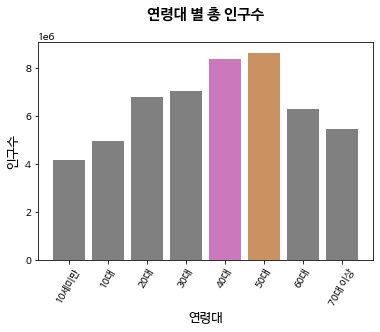

In [ ]:
# 연령별 인구현황

age19 = [age_0,age_10,age_20,age_30,age_40,age_50,age_60,age_70]
colors = ['gray','gray','gray','gray',age_colors_lst[4],age_colors_lst[5],'gray','gray']

plt.bar(['10세미만','10대','20대','30대','40대','50대','60대','70대 이상'], age19, color=colors)

plt.xticks(rotation = 60)
plt.xlabel('연령대', size=13)
plt.ylabel('인구수', size=13)
plt.title('연령대 별 총 인구수', size=15, weight='bold', y=1.08)
plt.show()
# 40, 50대가 전체인구 중 높은 비율을 차지하는 것을 알 수 있음

**<font color='#013ADF'> 연령별 인구 데이터 분석 결과</font>**

연령별 총 인구 수를 살펴볼 때, 40~50대의 인구 수가 많음을 알 수 있습니다.

**[자료출처]**
- 연령별출국현황.xls : 관광지식정보시스템 - 통계 - 관광객통계 - 출국관광통계 (https://know.tour.go.kr/stat/exitTourStatDis19Re.do)

In [ ]:
# 데이터 불러오기

age_exit = pd.read_excel('/content/drive/MyDrive/DACON_플랫폼통합경진대회/연령별출국현황.xls')

In [ ]:
age_exit = age_exit.drop(age_exit.index[0])

In [ ]:
# object열들 int로 

for i in range(1,len(age_exit.columns)):
    age_exit.iloc[:,i] = age_exit.iloc[:,i].astype(int)

In [ ]:
age_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     10 non-null     object
 1   2005년   10 non-null     int64 
 2   2006년   10 non-null     int64 
 3   2007년   10 non-null     int64 
 4   2008년   10 non-null     int64 
 5   2009년   10 non-null     int64 
 6   2010년   10 non-null     int64 
 7   2011년   10 non-null     int64 
 8   2012년   10 non-null     int64 
 9   2013년   10 non-null     int64 
 10  2014년   10 non-null     int64 
 11  2015년   10 non-null     int64 
 12  2016년   10 non-null     int64 
 13  2017년   10 non-null     int64 
 14  2018년   10 non-null     int64 
 15  2019년   10 non-null     int64 
 16  2020년   10 non-null     int64 
 17  2021년   10 non-null     int64 
 18  계       10 non-null     int64 
dtypes: int64(18), object(1)
memory usage: 1.6+ KB


In [ ]:
age_exit

,연령별,2005년,2006년,2007년,2008년,2009년,2010년,2011년,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,계
1,0 ~ 10,370215,435069,520417,454041,333287,483650,493351,548614,636988,727970,943513,1180184,1521314,1614819,1605312,190179,27895,12086818
2,11 ~ 20,674295,802734,949753,844094,579897,834551,855760,877247,940718,972769,1253079,1525331,1870042,2015476,1939372,367908,39791,17342817
3,21 ~ 30,1672821,1922433,2179629,2003121,1635335,1984574,1986211,2103810,2243851,2490443,3148565,3825443,4621817,4928816,4841583,701362,82760,42372574
4,31 ~ 40,2169999,2454843,2806640,2551668,2036500,2588354,2648733,2854094,3116279,3386235,3910321,4408523,5174462,5419475,5415061,646999,93569,51681755
5,41 ~ 50,2173751,2455250,2751568,2416351,1876570,2444700,2470065,2641406,2847335,3078382,3639247,4156605,4895235,5306236,5214076,743189,87107,49197073
6,51 ~ 60,1324471,1636540,1939995,1713049,1300941,1922604,1974217,2245089,2409107,2632272,3188399,3632897,4213782,4658349,4734046,625392,54126,40205276
7,61 ~ 70,666727,772756,916370,790911,576551,912756,887214,927223,1013801,1099877,1385964,1654850,1985148,2334173,2477488,323012,25452,18750273
8,71 ~,156437,191499,230708,200023,156410,248042,244169,276659,317218,338140,416566,460403,555211,651045,693477,90565,9590,5236162
9,승무원,871427,938755,1029897,1022836,998620,1069133,1134013,1262834,1321188,1354596,1424776,1538954,1659436,1767594,1793832,587400,273904,20049195
10,전 체,10080143,11609879,13324977,11996094,9494111,12488364,12693733,13736976,14846485,16080684,19310430,22383190,26496447,28695983,28714247,4276006,694194,256921943


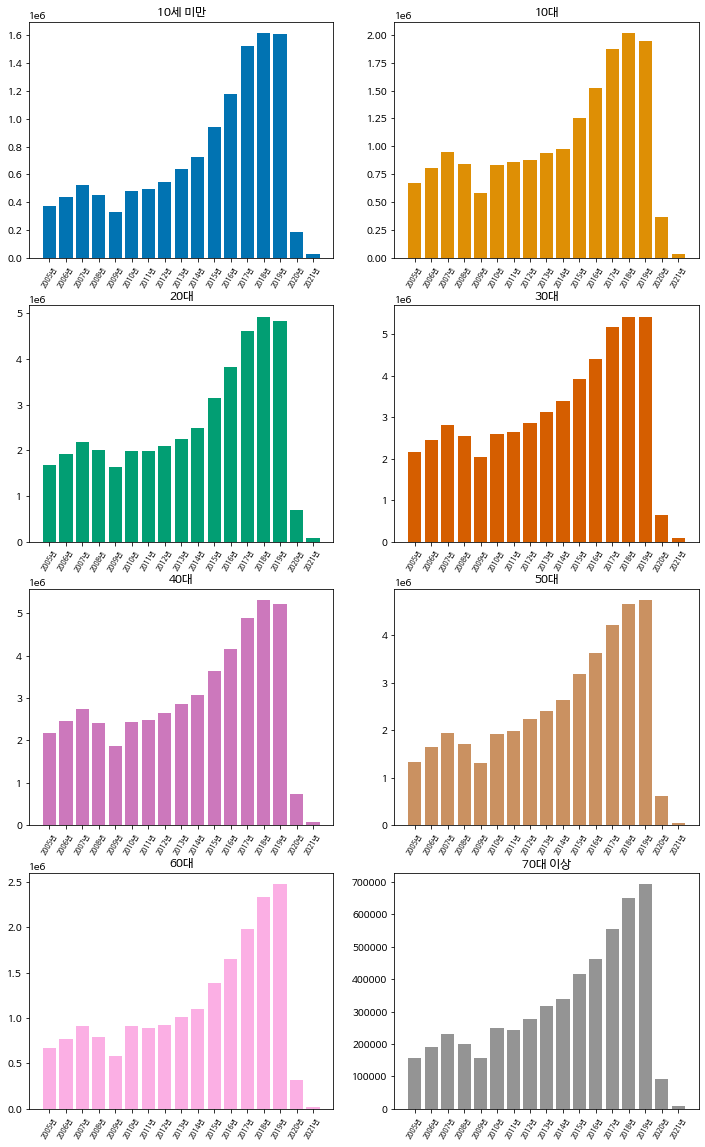

In [ ]:
# 연령별 출국인원의 증가 그래프, 증가율 확인

f, ax = plt.subplots(4, 2, figsize=(12,20))

ax[0,0].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[0,:][1:-1], color = age_colors_lst[0])
ax[0,0].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[0,0].set_title('10세 미만')

ax[0,1].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[1,:][1:-1], color = age_colors_lst[1])
ax[0,1].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[0,1].set_title('10대')

ax[1,0].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[2,:][1:-1], color = age_colors_lst[2])
ax[1,0].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[1,0].set_title('20대')

ax[1,1].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[3,:][1:-1], color = age_colors_lst[3])
ax[1,1].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[1,1].set_title('30대')

ax[2,0].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[4,:][1:-1], color = age_colors_lst[4])
ax[2,0].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[2,0].set_title('40대')

ax[2,1].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[5,:][1:-1], color = age_colors_lst[5])
ax[2,1].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[2,1].set_title('50대')

ax[3,0].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[6,:][1:-1], color = age_colors_lst[6])
ax[3,0].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[3,0].set_title('60대')

ax[3,1].bar(age_exit.iloc[0,:].index[1:-1],age_exit.iloc[7,:][1:-1], color = age_colors_lst[7])
ax[3,1].set_xticklabels(age_exit.iloc[0,:].index[1:-1], rotation=60, fontsize=7)
ax[3,1].set_title('70대 이상')

plt.show()

**<font color='#013ADF'> 출국 인원 데이터 중간 분석 결과</font>**

그래프에서 볼 수 있듯이 코로나가 시작하는 2020년 전까지 모든 연령대에서 해외여행 건수가 증가하는 것을 확인할 수 있습니다.

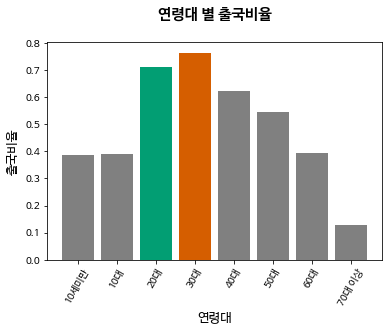

In [ ]:
# 연령별 출국비율

exit_ratio = age_exit['2019년'].iloc[:8]/age19
colors = ['gray','gray',age_colors_lst[2],age_colors_lst[3],'gray','gray','gray','gray']

plt.bar(['10세미만','10대','20대','30대','40대','50대','60대','70대 이상'], exit_ratio, color=colors)

plt.xticks(rotation = 60)
plt.xlabel('연령대', size=13)
plt.ylabel('출국비율', size=13)
plt.title('연령대 별 출국비율', size=15, weight='bold', y=1.08)
plt.show()

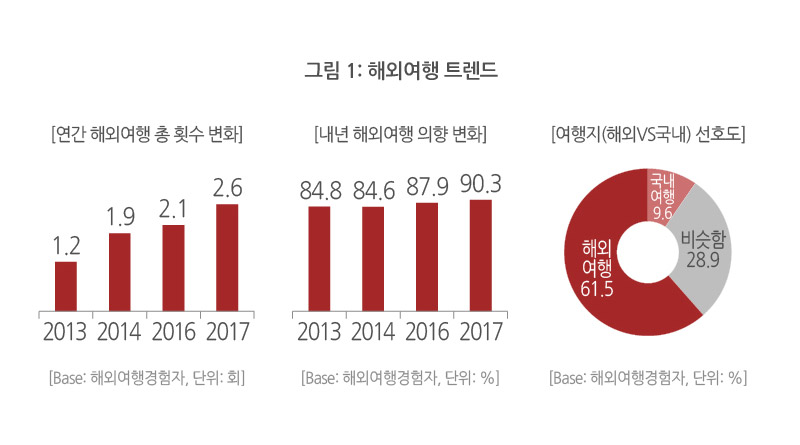

**[자료출처]** 한국 리서치 (https://www.hrc.co.kr/InfoCenter/TrendReport_View.aspx?boardkey=issue1129&listpageno=1&listsearchtext=&rnd=1)

**<font color='#013ADF'> 해외 여행 인구 데이터 분석 결과</font>**

국내 연령대별 인구수와 출국비율을 계산해 연령대 별 출국비율을 계산하였을 때 다른 연령대에 비해 20대와 30대의 출국비율이 높은 것을 확인할 수 있습니다. 

따라서 기존 KT분석 데이터에서 현지인과 외지인의 관광객 비율이 높게 나타난 20대, 40대, 50대 중 코로나 이전까지 높아지던 해외여행에 대한 선호도를 고려해보았을 때, 20대는 코로나가 끝나게 된 시점에서 국내여행보다는 해외여행을 가는 비율이 높아질 것으로 추측할 수 있습니다. 반면 40대, 50대는 주로 가족단위의 여행을 선호하고 해외여행에 대한 선호도가 그리 크지 않기 때문에 국내 여행 비율이 쉽게 떨어지지 않을 것으로 예측할 수 있습니다.

앞에서 소개한 KORAIL 데이터 분석과 20대의 해외여행 선호 현상을 근거로 코로나 이후 현지인과 외지인 모두 40, 50대 관광객을 타겟 고객으로 선정하여 이들의 관광을 유인할 수 있는 전략을 취하고자 합니다.

# 3. 현지인

우선 40, 50대 현지인 관광객을 유인해 지역의 경제를 활성화할 수 있는 전략을 소개하겠습니다.

## 3.1. 지역화폐 활용

### 3.1.1. 경기도지역화폐데이터

**[자료출처]**
- 경기도지역화폐사용량.csv : 경기지역경제포털 (https://bigdata-region.kr/#/dataset/cf6c467e-18b9-4d3a-bd10-5e8473434d36)

In [ ]:
# 데이터 불러오기

kk_local = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/경기도지역화폐사용량.csv', encoding = 'utf-8',low_memory = False)
kk_local

,분석인덱스,가맹점우편번호,성별코드,연령대코드,결제수,업종대분류명,상가수
0,0,10125,M,40,1,C제조업,15
1,1,10125,M,40,1,E하수·폐기물처리;원료재생및환경복원업,1
2,2,10125,M,40,1,F건설업,5
3,3,10125,M,40,1,G도매및소매업,52
4,4,10125,M,40,1,H운수업,9
...,...,...,...,...,...,...,...
531771,531771,18635,M,60,2,G도매및소매업,12
531772,531772,18635,M,60,2,H운수업,1
531773,531773,18635,M,60,2,I숙박및음식점업,4
531774,531774,18635,M,60,2,Q보건업및사회복지서비스업,1


In [ ]:
# 연령대별 결제수 합계

kk_local.groupby('연령대코드')['결제수'].sum().reset_index()

,연령대코드,결제수
0,10,817646
1,20,6985275
2,30,21058769
3,40,34917317
4,50,17583348
5,60,5085675
6,70,1033179
7,80,165041
8,90,6482
9,90+,160


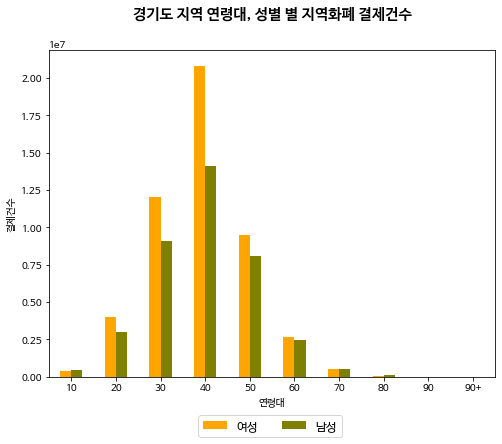

In [ ]:
# 경기도 지역 연령대, 성별 별 지역화폐 결제건수

kk_localT = kk_local.groupby(['연령대코드','성별코드'])['결제수'].sum().reset_index()

pd.pivot_table(kk_localT, index='연령대코드', columns='성별코드', values ='결제수').plot(kind='bar',
                                                                                         rot=0, color=colors_sex, figsize = (8,6))
plt.xlabel('연령대')
plt.ylabel('결제건수')
plt.title('경기도 지역 연령대, 성별 별 지역화폐 결제건수', size=15, weight='bold', y=1.08)
plt.legend(bbox_to_anchor = (0.67,-0.1), prop = {'size' : 12}, ncol = 2, labels=['여성','남성'])
plt.show()

**<font color='#013ADF'> 경기도 지역 화폐 데이터 중간 분석 결과</font>**

경기 지역을 예로 보면, 지역화폐를 주로 사용하는 40\~50대임을 알 수 있습니다. 이들을 중심으로 지역화폐를 활성화시켜 지역 경제 성장에 도움이 될 것으로 기대됩니다.

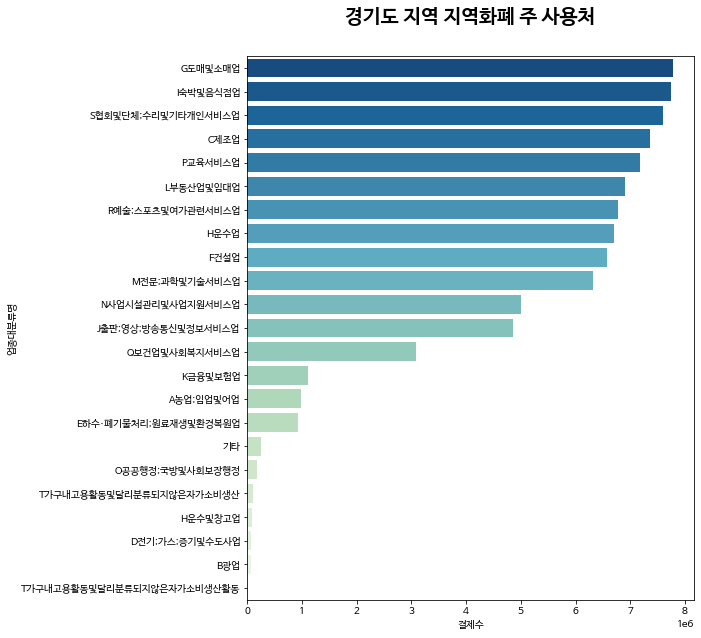

In [ ]:
# 결제 건수 기준 상위 업종대분류 시각화

plt.figure(figsize=(8,10))

sns.barplot(y=kk_local.groupby('업종대분류명')['결제수'].sum().reset_index().sort_values(by='결제수', ascending=False)['업종대분류명'],
            x=kk_local.groupby('업종대분류명')['결제수'].sum().reset_index().sort_values(by='결제수', ascending=False)['결제수'],
            palette='GnBu_r')

plt.title('경기도 지역 지역화폐 주 사용처', size=20, weight='bold', y=1.05)
plt.show()

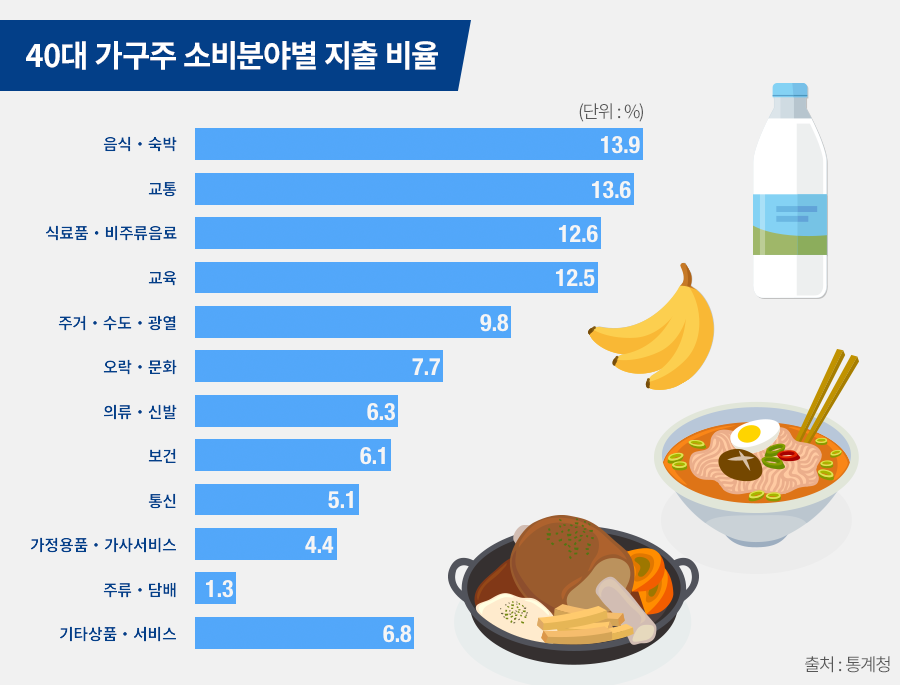

**[자료출처]**
효성 FMS(https://www.hyosungfms.com/fms/promote/fms_news_view.do?id_boards=13409)

**<font color='#013ADF'> 경기도 지역 화폐 데이터 분석 결과</font>**

경기도의 지역화폐 사용 업종 중 상위를 차지하고 있는 업종은 표준산업업종대분류 기준 G(도매 및 소매업), I(숙박 및 음식점업), P(교육 서비스업) 입니다. 이는 통계청에서 조사한 40\~50대의 주요 소비처와 겹치기 때문에 지역화폐의 사용은 40\~50대의 소비력을 높이는 효과를 가져올 수 있습니다.

### 3.1.2. 서울 / 강원도 / 경남 지역화폐 데이터

**[자료출처]**
- 서울시지역화폐.csv : 서울시 지역화폐 데이터 통계_KFM_2nd_ORIGIN_KFMZEROSTT001_20210901000000.csv, KT빅데이터플랫폼(https://www.bigdata-telecom.kr)
- 강원도지역화폐.csv : IBK기업 제로페이 통계_KFM_2nd_ORIGIN_KFMZEROSTT011_20210901000000.csv, KT빅데이터플랫폼(https://www.bigdata-telecom.kr)
- 경상남도지역화폐.csv : 경남 지역화폐 데이터 통계_KFM_2nd_ORIGIN_KFMZEROSTT004_20210901000000.csv, KT빅데이터플랫폼(https://www.bigdata-telecom.kr)

In [ ]:
# 서울 / 강원도 / 경남 지역화폐 데이터 (2020.08~2020.09)
# KT 통신 빅데이터 플랫폼

data_path = '/content/drive/MyDrive/DACON_플랫폼통합경진대회/'

# 서울시 지역화폐 데이터 통계
seoul = pd.read_csv(data_path + '서울시지역화폐.csv', encoding='cp949')

# IBK기업 제로페이 통계
gangwon = pd.read_csv(data_path + '강원도지역화폐.csv', encoding='cp949')

# 경남 지역화폐 데이터 통계
gyeongnam = pd.read_csv(data_path + '경상남도지역화폐.csv', encoding='cp949')

In [ ]:
# 데이터 합치기

localpay = pd.concat([seoul, gangwon, gyeongnam], ignore_index = True)
localpay.head()

,소상공인결제분류코드,년월,광역시도코드,광역시도명,결제건수,합계금액,표준산업업종대분류코드,표준산업업종상세분류코드
0,ZEROP11000,202008,11,서울특별시,0,0,C,10111
1,ZEROP11000,202008,11,서울특별시,94,1091000,C,10121
2,ZEROP11000,202008,11,서울특별시,892,78332714,C,10122
3,ZEROP11000,202008,11,서울특별시,77,1926970,C,10129
4,ZEROP11000,202008,11,서울특별시,44,1315210,C,10211


In [ ]:
# 필요데이터 추가 및 데이터 타입 변경

localpay['년월'] = localpay['년월'].astype('str')

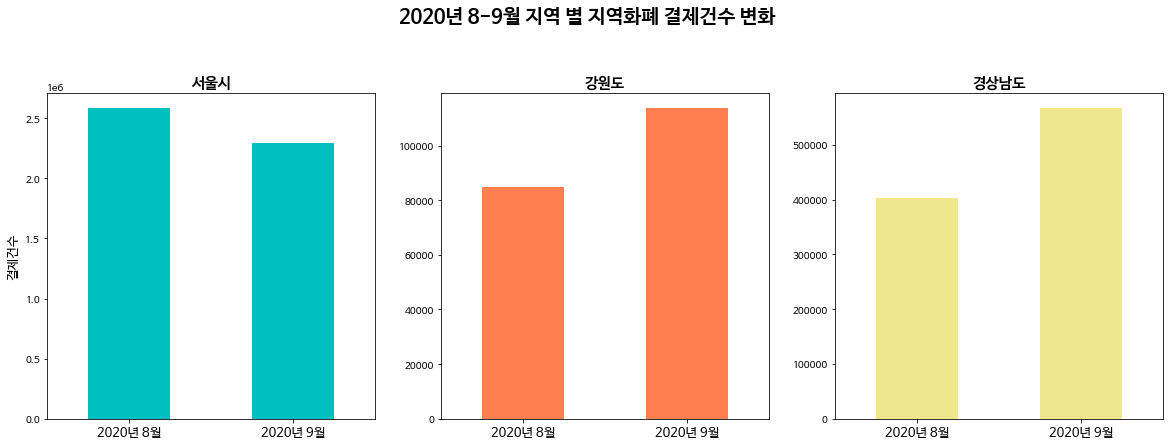

In [ ]:
# 202008, 202009 지역별 결제 건수 변화

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

localpay[localpay['광역시도명']=='서울특별시'].groupby('년월')['결제건수'].sum().plot.bar(ax = axes[0], color='c')
axes[0].set_title('서울시', size=15, weight='bold')
axes[0].set_xticklabels(['2020년 8월','2020년 9월'], size=13, rotation=0)
axes[0].set_xlabel('')
axes[0].set_ylabel('결제건수', size=13)

localpay[localpay['광역시도명']=='강원도'].groupby('년월')['결제건수'].sum().plot.bar(ax = axes[1], color='coral')
axes[1].set_title('강원도', size=15, weight='bold')
axes[1].set_xticklabels(['2020년 8월','2020년 9월'], size=13, rotation=0)
axes[1].set_xlabel('')

localpay[localpay['광역시도명']=='경상남도'].groupby('년월')['결제건수'].sum().plot.bar(ax = axes[2], color='khaki')
axes[2].set_title('경상남도', size=15, weight='bold')
axes[2].set_xticklabels(['2020년 8월','2020년 9월'], size=13, rotation=0)
axes[2].set_xlabel('')

plt.suptitle('2020년 8-9월 지역 별 지역화폐 결제건수 변화', size=20, weight='bold', y=1.08)
plt.show()

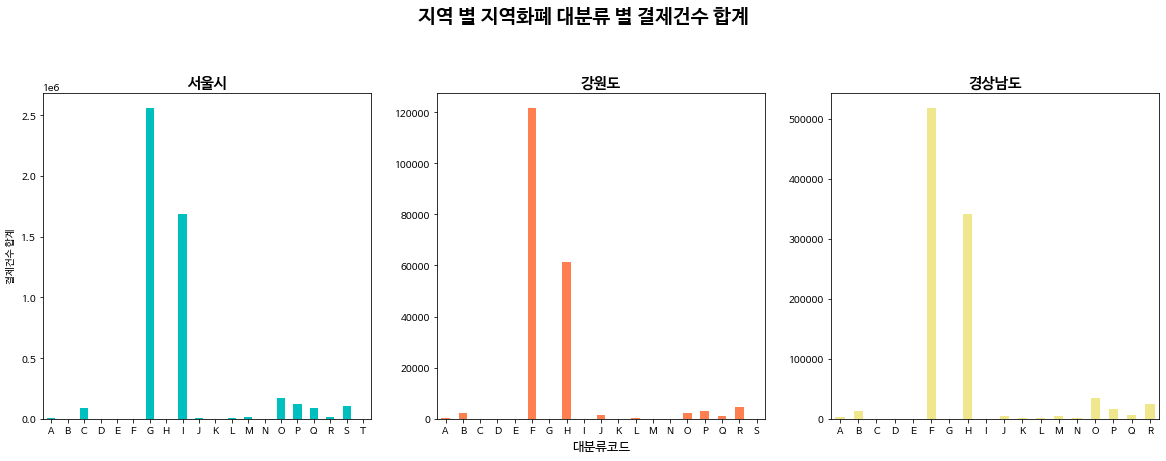

In [ ]:
# 대분류명별 결제건수 합계

xlabels = list(localpay[localpay['광역시도명']=='서울특별시'].groupby('표준산업업종대분류코드')['결제건수'].sum().index)

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

localpay[localpay['광역시도명']=='서울특별시'].groupby('표준산업업종대분류코드')['결제건수'].sum().plot.bar(ax = axes[0], color='c')
axes[0].set_title('서울시', size=15, weight='bold')
axes[0].set_xticklabels(xlabels, rotation = 0)
axes[0].set_xlabel('')
axes[0].set_ylabel('결제건수 합계')

localpay[localpay['광역시도명']=='강원도'].groupby('표준산업업종대분류코드')['결제건수'].sum().plot.bar(ax = axes[1], color='coral')
axes[1].set_title('강원도', size=15, weight='bold')
axes[1].set_xticklabels(xlabels, rotation = 0)
axes[1].set_xlabel('대분류코드', size=13)

localpay[localpay['광역시도명']=='경상남도'].groupby('표준산업업종대분류코드')['결제건수'].sum().plot.bar(ax = axes[2], color='khaki')
axes[2].set_title('경상남도', size=15, weight='bold')
axes[2].set_xticklabels(xlabels, rotation = 0)
axes[2].set_xlabel('')

plt.suptitle('지역 별 지역화폐 대분류 별 결제건수 합계', size=20, weight='bold', y=1.08)
plt.show()

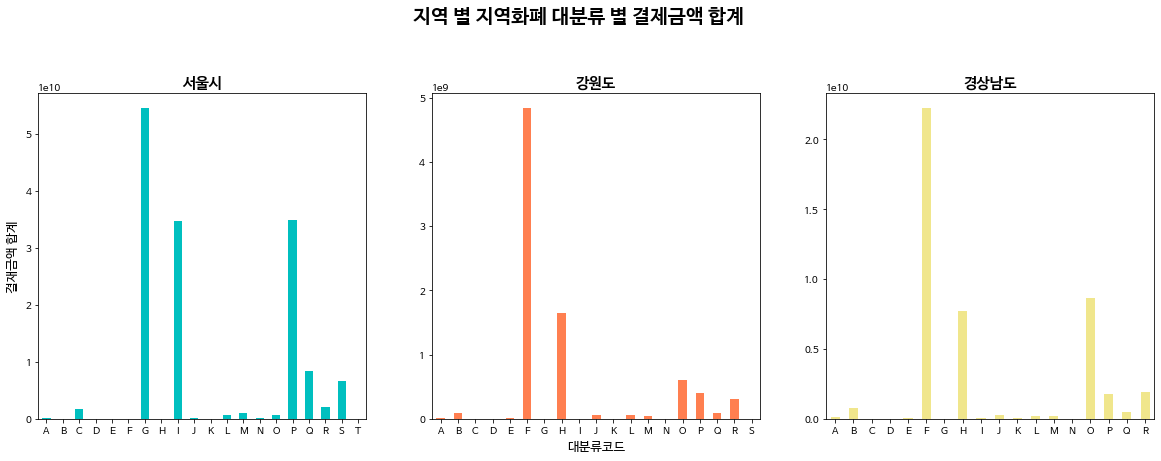

In [ ]:
# 대분류명별 결제금액 합계

fig, axes = plt.subplots(1, 3, figsize = (20, 6))

localpay[localpay['광역시도명']=='서울특별시'].groupby('표준산업업종대분류코드')['합계금액'].sum().plot.bar(ax = axes[0], color='c')
axes[0].set_title('서울시', size=15, weight='bold')
axes[0].set_xticklabels(xlabels, rotation = 0)
axes[0].set_xlabel('')
axes[0].set_ylabel('결재금액 합계', size=13)

localpay[localpay['광역시도명']=='강원도'].groupby('표준산업업종대분류코드')['합계금액'].sum().plot.bar(ax = axes[1], color='coral')
axes[1].set_title('강원도', size=15, weight='bold')
axes[1].set_xticklabels(xlabels, rotation = 0)
axes[1].set_xlabel('대분류코드', size=13)

localpay[localpay['광역시도명']=='경상남도'].groupby('표준산업업종대분류코드')['합계금액'].sum().plot.bar(ax = axes[2], color='khaki')
axes[2].set_title('경상남도', size=15, weight='bold')
axes[2].set_xticklabels(xlabels, rotation = 0)
axes[2].set_xlabel('')

plt.suptitle('지역 별 지역화폐 대분류 별 결제금액 합계', size=20, weight='bold', y=1.08)
plt.show()

**[자료출처]**
- 한국표준산업분류(10차)_표.xlsx : 통계청 통계분류포털 (https://kssc.kostat.go.kr:8443/ksscNew_web/index.jsp)

In [ ]:
# 데이터 불러오기

bizcode = pd.read_excel(data_path + '한국표준산업분류(10차)_표.xlsx')

In [ ]:
# 대분류코드 확인

biz_big = bizcode.iloc[:, :2].dropna(axis = 0).set_index(['대분류코드'])
biz_big.head()

,대분류항목명
대분류코드,
A,"농업, 임업 및 어업(01~03)"
B,광업(05~08)
C,제조업(10~34)
D,"전기, 가스, 증기 및 공기 조절 공급업(35)"
E,"수도, 하수 및 폐기물 처리, 원료 재생업(36~39)"


In [ ]:
biz_big['대분류항목명'] = biz_big['대분류항목명'].str.split('(').str[0]
biz_big.head()

,대분류항목명
대분류코드,
A,"농업, 임업 및 어업"
B,광업
C,제조업
D,"전기, 가스, 증기 및 공기 조절 공급업"
E,"수도, 하수 및 폐기물 처리, 원료 재생업"


In [ ]:
biz_big.loc[['G', 'I', 'P'], :]

,대분류항목명
대분류코드,
G,도매 및 소매업
I,숙박 및 음식점업
P,교육 서비스업


In [ ]:
# 대분류 별 결제건수 상위 2개의 상세분류 분석

top_biz = localpay.query("표준산업업종대분류코드 in ['G', 'I']")

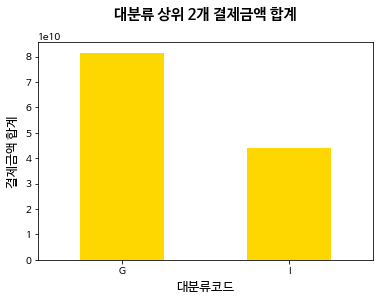

In [ ]:
top_biz.groupby('표준산업업종대분류코드')['합계금액'].sum().plot.bar(color='gold')

plt.xlabel('대분류코드', size=13)
plt.ylabel('결제금액 합계', size=13)
plt.xticks(rotation = 0)
plt.title('대분류 상위 2개 결제금액 합계', size=15, weight='bold', y=1.08)
plt.show()

**<font color='#013ADF'> 서울시, 강원도, 경상남도 지역화폐 데이터 중간 분석 결과</font>**

지역화폐 사용 업종 중 상위를 차지하고 있는 업종은 표준산업업종대분류 기준 G(도매 및 소매업), I(숙박 및 음식점업), P(교육 서비스업) 입니다. 그 중 결제 건수 및 금액 모두 상위를 차지하고 있는 G(도매 및 소매업), I(숙박 및 음식점업)을 중심으로 상세 업종을 살펴보려 합니다.

In [ ]:
# 상세 분류 상위 5 분석

top_biz_detail = list(top_biz.groupby('표준산업업종상세분류코드')['합계금액'].sum().sort_values(ascending = False)[:5].index)

In [ ]:
# 상세 분류 상위 5개에 해당하는 데이터 뽑기

top_biz = top_biz.query("표준산업업종상세분류코드 in @top_biz_detail")

In [ ]:
# 상세 분류 코드, 상세 분류명으로 변환

biz_detail = bizcode.iloc[:, 2:].set_index(['세세분류코드'])
biz_detail.head()

,세세분류항목명
세세분류코드,
1110.0,곡물 및 기타 식량작물 재배업
1121.0,채소작물 재배업
1122.0,화훼작물 재배업
1123.0,종자 및 묘목 생산업
1131.0,과실작물 재배업


In [ ]:
# 분류코드 column, 분류명으로 변환

top_biz['표준산업업종상세분류코드'] = top_biz['표준산업업종상세분류코드'].apply(lambda x : biz_detail.loc[x].세세분류항목명)

In [ ]:
top_biz.rename(columns={'표준산업업종상세분류코드' : '표준산업업종상세분류명'}, inplace = True)

In [ ]:
top_biz.head()

,소상공인결제분류코드,년월,광역시도코드,광역시도명,결제건수,합계금액,표준산업업종대분류코드,표준산업업종상세분류명
547,ZEROP11000,202008,11,서울특별시,450822,9005673531,G,슈퍼마켓
548,ZEROP11000,202008,11,서울특별시,439059,3470813139,G,체인화 편의점
552,ZEROP11000,202008,11,서울특별시,66561,1997719482,G,육류 소매업
582,ZEROP11000,202008,11,서울특별시,1077,643454270,G,가구 소매업
661,ZEROP11000,202008,11,서울특별시,274487,8659088603,I,한식 일반 음식점업


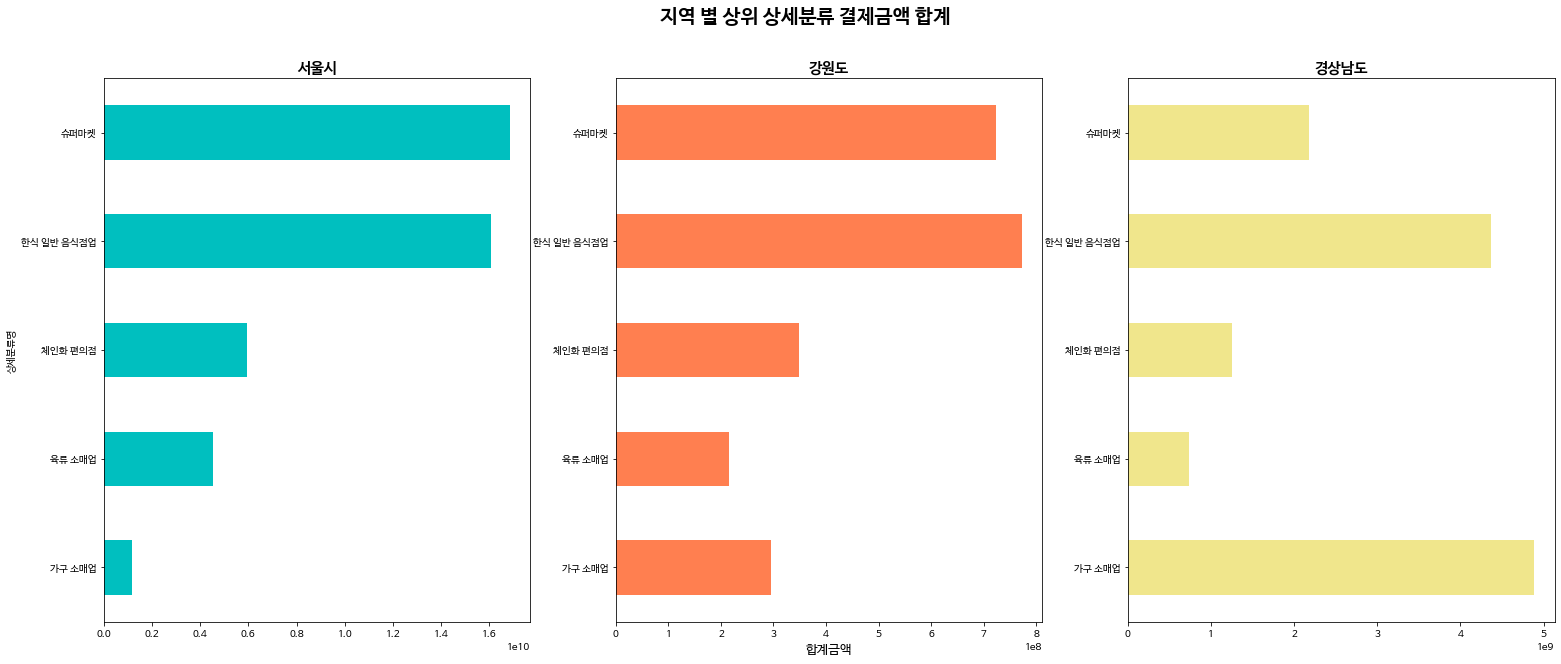

In [ ]:
# 상위 상세 분류, 지역별 합계금액

# 오름차순 정렬
sort_biz = top_biz[top_biz['광역시도명']=='서울특별시'].groupby('표준산업업종상세분류명')['합계금액'].sum().sort_values().index

fig, axes = plt.subplots(1, 3, figsize = (26, 10))

top_biz[top_biz['광역시도명']=='서울특별시'].groupby('표준산업업종상세분류명')['합계금액'].sum().sort_values().plot.barh(ax = axes[0], color='c')
axes[0].set_title('서울시', size=15, weight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('상세분류명')

top_biz[top_biz['광역시도명']=='강원도'].groupby('표준산업업종상세분류명')['합계금액'].sum()[sort_biz].plot.barh(ax = axes[1], color='coral')
axes[1].set_title('강원도', size=15, weight='bold')
axes[1].set_xlabel('합계금액', size=13)
axes[1].set_ylabel('')

top_biz[top_biz['광역시도명']=='경상남도'].groupby('표준산업업종상세분류명')['합계금액'].sum()[sort_biz].plot.barh(ax = axes[2], color='khaki')
axes[2].set_title('경상남도', size=15, weight='bold')
axes[2].set_ylabel('')
axes[2].set_xlabel('')

plt.suptitle('지역 별 상위 상세분류 결제금액 합계', size=20, weight='bold')
plt.show()

**<font color='#013ADF'> 서울시, 강원도, 경상남도 지역화폐 데이터 분석 결과</font>**

슈퍼마켓같은 소매점과 일반 음식점에서 지역화폐는 일반적으로 많이 소비되는 형태를 보입니다. 경상남도에서만 크게 나타나는 가구 소매업 비중을 제외하면 서울, 강원, 경남 세 지역 모두 일반 음식점에서 소비되는 비중이 높게 나타남을 확인할 수 있습니다.

# 4. 외지인

## 4.1. 거주지 기반 외지인 유입비율

In [ ]:
# 거주지기반유입비율

gns_rd = pd.read_csv(kt_data + gns + rd, encoding = 'cp949')
display(gns_rd.head(3))

mps_rd = pd.read_csv(kt_data + mps + rd, encoding = 'cp949')
display(mps_rd.head(3))

jjs_rd = pd.read_csv(kt_data + jjs + rd, encoding = 'cp949')
display(jjs_rd.head(3))

,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,강릉시,42150,강원도 원주시,42130,3.022266
1,20190301,강릉시,42150,강원도 동해시,42170,2.915242
2,20190301,강릉시,42150,서울특별시 송파구,11710,1.961332


,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,목포시,46110,전라남도 무안군,46840,15.663929
1,20190301,목포시,46110,전라남도 영암군,46830,7.926931
2,20190301,목포시,46110,전라남도 신안군,46910,5.049997


,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,전주시 완산구,45111,전라북도 전주시 덕진구,45113,26.334154
1,20190301,전주시 완산구,45111,전라북도 완주군,45710,5.072352
2,20190301,전주시 완산구,45111,전라북도 익산시,45140,4.325739


In [ ]:
# 데이터 합치기

s_rd = pd.concat([gns_rd, mps_rd, jjs_rd], ignore_index = True)
s_rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263360 entries, 0 to 263359
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ETL_YMD      263360 non-null  int64  
 1   SGG_NM       263360 non-null  object 
 2   SGG_CD       263360 non-null  int64  
 3   RESD_INFO    263360 non-null  object 
 4   RESD_SGG_CD  263360 non-null  int64  
 5   O_RATE_CNT   263360 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 12.1+ MB


In [ ]:
# 지역군 나온 데이터에 쓸 함수 만들기
# 방문지 별 관광객 거주지 및 이동지역 pivot_table 만드는 함수

# data : 강릉/목포/전주 데이터 합치기
# column_name : 평균 값 뽑을 칼럼명


def local(data, column_name) :
    
    # 세종특별자치시 세종특별자치시 -> 세종특별자치도 세종특별자치시 변경
    
    data['RESD_INFO'] = data['RESD_INFO'].apply(lambda x : x.replace('세종특별자치시 세종특별자치시','세종특별자치도 세종특별자치시'))
    
    
    # 필요 열 추가 및 변경 : 거주지 도(특별시)('RED_INFO')/시(구) 분류('RES_INFO')
    
    data['RED_INFO'] = data['RESD_INFO'].str.split().str[0]
    data['RES_INFO'] = data['RESD_INFO'].str.split().str[1]
    
    
    # 전주의 경우 전주시 덕진구, 전주시 완산구로 구 단위까지 표시되어있기 때문에  전주 -> 전주 이동의 경우, 'RESD_DO'는 전주, 'RESD_SI'는 덕진구/완산구로

    jj_index = data[data['RESD_INFO'].str.contains('전주')].index

    data.loc[jj_index, 'RED_INFO'] = data.iloc[jj_index, :]['RESD_INFO'].str.split().str[-2]
    data.loc[jj_index, 'RES_INFO'] = data.iloc[jj_index, :]['RESD_INFO'].str.split().str[-1]
    
    
    # 지역별 pivot_table

    return pd.pivot_table(data, index = ['RED_INFO', 'RES_INFO'], columns = 'SGG_NM', values = column_name, aggfunc = 'mean').fillna(0)

In [ ]:
# 방문지 별 관광객 거주지 : s_rd_do

s_rd_do = local(s_rd, 'O_RATE_CNT')
s_rd_do

SGG_NM                  강릉시       목포시   전주시 덕진구   전주시 완산구
RED_INFO RES_INFO                                        
강원도      강릉시       0.000000  0.082401  0.056746  0.067978
         고성군       0.851631  0.020657  0.015815  0.017118
         동해시       6.897436  0.040788  0.024390  0.024795
         삼척시       3.047627  0.022937  0.014353  0.020556
         속초시       3.366471  0.039921  0.026639  0.028409
...                     ...       ...       ...       ...
충청북도     제천시       0.435361  0.035388  0.030826  0.036552
         증평군       0.060508  0.022528  0.030603  0.028687
         진천군       0.132709  0.044880  0.052666  0.058870
         청주시       0.257123  0.103042  0.144698  0.146626
         충주시       0.811031  0.105472  0.134713  0.127178

[230 rows x 4 columns]

In [ ]:
# 방문지 별 관광객 거주지 상위 5개

for sgg_nm in s_rd['SGG_NM'].unique() :
    display(s_rd_do.sort_values(by = sgg_nm, ascending = False).head()[[sgg_nm]])

SGG_NM                  강릉시
RED_INFO RES_INFO          
강원도      동해시       6.897436
         원주시       4.149432
         평창군       3.851532
         속초시       3.366471
         양양군       3.168838

SGG_NM                   목포시
RED_INFO RES_INFO           
전라남도     무안군       23.409086
         영암군       10.731657
         신안군        6.984084
광주광역시    북구         4.128300
         광산구        4.048225

SGG_NM               전주시 완산구
RED_INFO RES_INFO           
전주시      덕진구       41.570859
전라북도     완주군        7.784456
         익산시        5.362549
         군산시        3.758076
         김제시        3.525543

SGG_NM               전주시 덕진구
RED_INFO RES_INFO           
전주시      완산구       40.596911
전라북도     완주군       10.165938
         익산시        6.486244
         군산시        4.435845
         김제시        2.459618

**<font color='#013ADF'>거주지 기반 유입비율 분석 결과</font>**

 해당 도시 인근 지역에서 방문하는 경우가 많은 것을 확인할 수 있습니다.

## 4.2. 24시간 이후 이동비율

In [ ]:
# 24시간이후이동비율(외지인)

gns_o_24 = pd.read_csv(kt_data + gns + o_24, encoding = 'cp949')
display(gns_o_24.head(3))

mps_o_24 = pd.read_csv(kt_data + mps + o_24, encoding = 'cp949')
display(mps_o_24.head(3))

jjs_o_24 = pd.read_csv(kt_data + jjs + o_24, encoding = 'cp949')
display(jjs_o_24.head(3))

,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,강릉시,42150,강원도 강릉시,42150,36.885100
1,20190301,강릉시,42150,강원도 속초시,42210,4.291718
2,20190301,강릉시,42150,강원도 평창군,42760,3.883265


,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,목포시,46110,전라남도 목포시,46110,37.301772
1,20190301,목포시,46110,전라남도 무안군,46840,6.296642
2,20190301,목포시,46110,광주광역시 서구,29140,3.206623


,ETL_YMD,SGG_NM,SGG_CD,RESD_INFO,RESD_SGG_CD,O_RATE_CNT
0,20190301,전주시 완산구,45111,전라북도 전주시 완산구,45111,33.046850
1,20190301,전주시 완산구,45111,전라북도 전주시 덕진구,45113,12.730210
2,20190301,전주시 완산구,45111,전라북도 완주군,45710,3.741519


In [ ]:
# 데이터 합치기

s_o_24 = pd.concat([gns_o_24, mps_o_24, jjs_o_24], ignore_index = True)
s_o_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244168 entries, 0 to 244167
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ETL_YMD      244168 non-null  int64  
 1   SGG_NM       244168 non-null  object 
 2   SGG_CD       244168 non-null  int64  
 3   RESD_INFO    244168 non-null  object 
 4   RESD_SGG_CD  244168 non-null  int64  
 5   O_RATE_CNT   244168 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 11.2+ MB


In [ ]:
# 방문지 별 이동지역 : s_o_24_do

s_o_24_do = local(s_o_24, 'O_RATE_CNT')
s_o_24_do

SGG_NM                   강릉시       목포시   전주시 덕진구   전주시 완산구
RED_INFO RES_INFO                                         
강원도      강릉시       49.402774  0.029534  0.039692  0.034242
         고성군        0.993495  0.014464  0.015334  0.011425
         동해시        2.004006  0.018128  0.014754  0.013898
         삼척시        1.769986  0.017963  0.014329  0.012515
         속초시        2.516560  0.016938  0.022223  0.021224
...                      ...       ...       ...       ...
충청북도     제천시        0.225191  0.023566  0.026769  0.026358
         증평군        0.022569  0.015214  0.018099  0.019364
         진천군        0.073154  0.027151  0.041924  0.036594
         청주시        0.119889  0.067809  0.111617  0.123745
         충주시        0.244450  0.041552  0.064108  0.062368

[230 rows x 4 columns]

In [ ]:
# 방문지 별 이동지역 상위 5개

for sgg_nm in s_o_24['SGG_NM'].unique() :
    display(s_o_24_do.sort_values(by = sgg_nm, ascending = False).head()[[sgg_nm]])

SGG_NM                   강릉시
RED_INFO RES_INFO           
강원도      강릉시       49.402774
         평창군        3.245125
         양양군        2.564336
         속초시        2.516560
         동해시        2.004006

SGG_NM                   목포시
RED_INFO RES_INFO           
전라남도     목포시       53.779119
         무안군        6.229569
         영암군        3.767719
         신안군        3.170263
광주광역시    서구         1.986168

SGG_NM               전주시 완산구
RED_INFO RES_INFO           
전주시      완산구       52.711969
         덕진구       11.358670
전라북도     완주군        4.269433
         익산시        2.376060
         김제시        1.859645

SGG_NM               전주시 덕진구
RED_INFO RES_INFO           
전주시      덕진구       54.458643
         완산구       10.994081
전라북도     완주군        5.235968
         익산시        2.590436
         김제시        1.821127

**<font color='#013ADF'> 외지인 24시간 이후 이동비율 분석 결과</font>**

대부분 같은 시, 구로 이동하였거나 가까운 도시로 이동한 경우가 많습니다. 이를 보아 외지인 관광객은 한 관광지에서 그 주변 관광지로 이동하여 최소 이틀의 일정을 가지고 방문함을 알 수 있습니다. 

## 4.3. 지역별 문화 축제와 연동

**[자료출처]**
- 문화 행사 개최 시기별 전철역 이용인원.csv : 교통 데이터 거래소(https://www.bigdata-transportation.kr)

In [ ]:
# 문화 행사 개최 시기별 전철역 이용인원

localfestival = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/문화 행사 개최 시기별 전철역 이용인원.csv', encoding = 'utf-8')

In [ ]:
# 데이터 확인

localfestival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FSTVL_NM          1226 non-null   object 
 1   OPAR              1226 non-null   object 
 2   FSTVL_START_DATE  1226 non-null   int64  
 3   FSTVL_END_DATE    1226 non-null   int64  
 4   MNNST             1226 non-null   object 
 5   P_KOR_STN_NM      1226 non-null   object 
 6   P_STN_C_DST       1226 non-null   float64
 7   ARV_STN_CD        804 non-null    float64
 8   ARV_ABRD_PRNB     804 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 86.3+ KB


In [ ]:
# 코로나 이후엔 취소된 축제가 많기 때문에 이전 데이터 분석
# 2019년 축제로만 체크 : localfestival_2019

localfestival['FSTVL_START_DATE'] = localfestival['FSTVL_START_DATE'].astype(str)
localfestival_2019 = localfestival[localfestival['FSTVL_START_DATE'].str.contains('2019')].dropna()

In [ ]:
# 축제기간 column 추가

localfestival_2019['FSTVL_END_DATE'] = localfestival_2019['FSTVL_END_DATE'].astype(str)
localfestival_2019['FSTVL_START_DATE'] = pd.to_datetime(localfestival_2019['FSTVL_START_DATE'])
localfestival_2019['FSTVL_END_DATE'] = pd.to_datetime(localfestival_2019['FSTVL_END_DATE'])
localfestival_2019['축제기간'] = ((localfestival_2019['FSTVL_END_DATE'] - localfestival_2019['FSTVL_START_DATE']).astype(str).str.split().str[0]).astype(int) + 1

In [ ]:
# 축제기간 일평균 이용승객수 column 추가

localfestival_2019['축제기간평균이용승객수'] = (localfestival_2019['ARV_ABRD_PRNB'] // (localfestival_2019['축제기간']))

In [ ]:
localfestival_2019

,FSTVL_NM,OPAR,FSTVL_START_DATE,FSTVL_END_DATE,MNNST,P_KOR_STN_NM,P_STN_C_DST,ARV_STN_CD,ARV_ABRD_PRNB,축제기간,축제기간평균이용승객수
40,2019 계룡산벚꽃축제,계룡산 동학사 일원,2019-04-05,2019-04-14,계룡산축제추진위원회,계룡,9.8645,3900199.0,922.0,10,92.0
41,2019 계룡산산신제,계룡면 양화리 신원사일원,2019-04-20,2019-04-21,계룡산산신제보존회,공주,7.2006,3901026.0,394.0,2,197.0
42,2019 공주 석장리 구석기축제,석장리박물관,2019-05-03,2019-05-06,공주석장리구석기축제조직위원회,공주,15.2142,3901026.0,442.0,4,110.0
43,2019 광복기념음악회,병목안시민공원,2019-08-15,2019-08-15,(재)안양문화예술재단,안양,2.2622,3900039.0,409.0,1,409.0
45,2019 금정산성축제,"온천천(장전역 ~ 부산대지하철역), 금정산성다목적광장 일원",2019-05-24,2019-05-26,금정문화재단,화명,5.2150,3900110.0,195.0,3,65.0
...,...,...,...,...,...,...,...,...,...,...,...
1190,향촌동수제화골목 2019년「빨간구두 이야기」,향촌동수제화골목 일원,2019-10-19,2019-10-20,대구광역시 수제화협회,대구,0.4478,3900095.0,8934.0,2,4467.0
1195,형형색색 달구벌관등놀이,운동장,2019-04-05,2019-05-06,사단법인대구불교총연합회,대구,0.6728,3900095.0,7702.0,32,240.0
1196,호미곶한민족해맞이축전,호미곶 해맞이광장 일원,2019-12-31,2020-01-01,포항문화재단,포항,20.1924,3901040.0,4404.0,2,2202.0
1216,황태축제,강원도 인제군 북면 용대3리 용대삼거리,2019-06-06,2019-06-09,황태축제위원회+용대황태연합회,진부,66.7042,3901060.0,466.0,4,116.0


In [ ]:
# 축제기간과 비교 가능한 2019 데이터 불러오기

station_2019 = pd.read_csv('/content/drive/MyDrive/DACON_플랫폼통합경진대회/KORAIL)플랫폼통합경진대회 데이터/역별 승하차실적_2019.csv', encoding = 'utf-8')

In [ ]:
# 데이터 확인

station_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566321 entries, 0 to 566320
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   운행일자     566321 non-null  object 
 1   운행영업일단계  566321 non-null  object 
 2   주운행선     566321 non-null  object 
 3   상행하행구분   566321 non-null  object 
 4   역무열차종    566321 non-null  object 
 5   정차역      566321 non-null  object 
 6   메트릭      0 non-null       float64
 7   승차인원수    566321 non-null  object 
 8   하차인원수    566321 non-null  object 
dtypes: float64(1), object(8)
memory usage: 38.9+ MB


In [ ]:
# KORAIL 데이터에서 다뤄진 역무열차종만 포함

train = ['KTX', '새마을호', '무궁화호', 'KTX-산천', 'ITX-새마을', 'KTX-호남']
station_2019 = station_2019.query("역무열차종 in @train")

In [ ]:
# 축제 기간 고려하여 공휴일 운행 열차만 포함

station_2019 = station_2019.query("운행영업일단계 == '공휴일'")

In [ ]:
# 인원 수 필요한 데이터 형태로 변경

for column in ['승차인원수', '하차인원수'] :
    station_2019[column] = station_2019[column].map(lambda x : int(str(x).replace(',', '')))

In [ ]:
# 전체이용승객수 column 추가

station_2019['전체이용승객수'] = station_2019['승차인원수'] + station_2019['하차인원수']

In [ ]:
# 평소 승객수 데이터프레임

usual_pass = station_2019.groupby('정차역')['전체이용승객수'].mean().reset_index()

In [ ]:
# 축제 기간 승객수 데이터프레임
# 비교 위해 상위 10개 역만 분석

festival_pass = localfestival_2019.groupby('P_KOR_STN_NM')['축제기간평균이용승객수'].mean().reset_index().rename(columns = {'P_KOR_STN_NM' : '정차역', '축제기간평균이용승객수' : '축제시기승객수'}).sort_values(by = '축제시기승객수', ascending = False)[:10]

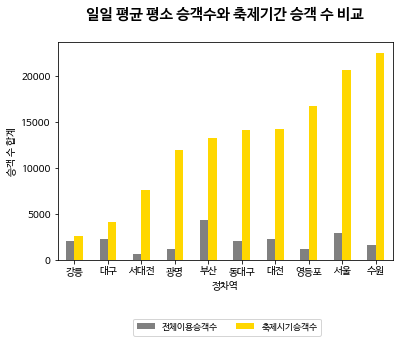

In [ ]:
# 평소 승객수, 축제기간 승객 수 비교

pd.merge(usual_pass, festival_pass).set_index('정차역').sort_values(by = '축제시기승객수').plot.bar(color=['gray','gold'])

plt.ylabel('승객 수 합계')
plt.title('일일 평균 평소 승객수와 축제기간 승객 수 비교', size=15, weight='bold', y=1.08)
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (0.8,-0.25), prop = {'size' : 9}, ncol = 3, labels = ['전체이용승객수','축제시기승객수'])
plt.show()

**<font color='#013ADF'>문화축제 기간 코레일 이용 수 분석 결과</font>**

코로나가 시작되기 전인 2019년 코레일 이용객 수를 살펴보면, 공휴일 일일 평균 승객 수보다 축제 기간의 일일 평균 승객 수가 크게 증가했음을 확인할 수 있습니다.
이러한 점을 바탕으로 외지인 유입에는 지역 축제의 영향이 클 것으로 예상할 수 있습니다.
또한, 코로나로 인해 그 동안 즐기지 못한 축제에 대한 사람들의 심리를 자극한다면 위의 분석 결과보다 더 큰 증가 효과가 기대됩니다.

# 5. 결론

저희는 기존 관광객 데이터를 분석하여 40\~50대를 타겟 고객으로 삼아 현지인과 외지인 관광객을 유입할 수 있는 방법을 찾기 위한 분석을 진행하였습니다. 

지금까지 분석한 바로는 
1. 타지역에서의 활성화되어 사용되는 지역화폐의 40\~50대 현지인의 비중이 높음
2. 지역화폐의 소비 지역은 주로 일반 음식점에서 높게 나타남
3. 외지인은 관광 시 목표 관광 지역 근처에서 돌아다니는 경향이 있음 
4. 지역별 문화축제가 열리는 날이면 코레일을 이용하는 승객 수가 크게 증가함  

으로 크게 정리할 수 있습니다. 그렇다면 이러한 인사이트를 통해 어떻게 지역 경제 활성화를 할 수 있을지 그 방안에 대해 제안해 보도록 하겠습니다.

## 5.1. 지역화폐를 활용한 전략

위에서 분석한 2020년 8-9월 지역 별 지역화폐 결제 건수를 보았을 때, 지역화폐가 활성화되어있는 서울에 반해 강원, 경남 지역은 비교적 적은 결제 건수이지만, 증가하는 추세를 보이고 있습니다. 이는 지역화폐에 대한 인지도가 오르고 있다고 해석할 수 있습니다. 또한 지역화폐의 주 사용처 및 결제금액을 보았을 때, 가장 높은 비중을 차지하는 분야는 <font color='green'>음식점</font>임을 알 수 있습니다.

이러한 점을 근거로 저희는 두 가지 방안을 제시합니다. <font color='Coral'>첫째는 지역화폐 사용 시 지역 내 음식점 통합 쿠폰을 제공하는 등의 지역화폐와 지역 음식점과의 연계를 높이는 것입니다.</font> 지역 화폐와 음식점과의 연계를 높여 현지인들의 많은 방문을 이끌어 낸다면 해당 음식점이 위치한 상권의 방문을 촉진시켜 효과적인 지역 경제 활성화를 도모할 수 있습니다.

<font color='Coral'>둘째로는 지역 경제 활성화를 위한 지역 커뮤니티를 활성화하는 것입니다.</font> 지역화폐의 사용 내역 및 결제 건수, 결제금액 등을 활용하여 현지인이 보장하고 추천하는 스팟 정보를 외지인에게 제공합니다. 외지인들은 이른바 맛집을 찾아가는 경향이 강하기에, 현지인만 아는 골목식당에 대한 정보를 공유한다면 여행을 온 외지인의 소비에 의한 지역 경제 활성화가 가능합니다. 이는 더 많은 금액의 소비가 가능한 40\~50대 관광객에게 효과적으로 작용할 것입니다.

추가적으로 신생 소상 기업을 위해 지자체에서 분기 별 홍보 희망 소상 기업을 접수받은 후 선정된 소상 기업은 지역화폐 앱 등을 통해 홍보한다면, 지역 내 경제의 선순환이 가능하며 효과적인 경제 활성화를 기대할 수 있습니다.

## 5.2. KORAIL에서 기존에 진행하던 제휴사업 확대 방안 제시

KORAIL이 현재 진행하고있는 역별 제휴사 목록 

( https://www.letskorail.com/common/join/adv/partner/w_ptnship001.do )


현재 코레일에서는 코레일 기차 탑승 승차권을 제시하면 다양한 할인 혜택을 받을 수 있도록 몇몇 역 근처 매장들과 제휴를 맺은 상태입니다. 이는 코레일 기차 이용의 증가와 함께 해당 지역의 경제 활성화를 돕는 좋은 방향성을 가졌지만, 코레일 기차가 지나다니는 역들의 개수에 비해 제휴사의 개수가 적고 홍보의 부족함 등의 이유로 코레일 이용객들이 많은 혜택을 얻지 못하고 있습니다. 따라서 저희는 외지인 관광객을 적극적으로 더 유치하기 위해 <font color='Coral'>현재 코레일이 운용하고 있는 이 제휴 혜택을 더욱 활성화해 지역 경제에 도움을 주는 것</font>이 좋을 것이라고 판단했습니다.

스마트폰을 통해 기차표를 쉽게 확인할 수 있는 코레일 앱을 활용해 해당 역까지의 기차를 이용했다면 코레일과 제휴를 맺은 매장에서 QR코드를 활용해 쉽게 할인 혜택을 받을 수 있는 방법 등이 가능합니다. 더 많은 매장과의 제휴 사업은 코레일 이용 고객들의 만족감을 높여줄 것이고 더 많은 기차 이용을 유인할 수 있습니다. ( 최근 코로나 인증으로 인해 40\~50대의 QR코드 사용이 익숙해진 것을 활용 )

또한 앞서 제안한 지역화폐 전략을 활용하여 지역화폐가 많이 사용되는 인기 음식점과 코레일과의 제휴는 <font color='Coral'>현지인에게 인증받은 골목식당</font>이라는 신뢰감을 형성해 멀리서 오는 외지인 관광객들의 소비를 유인할 수 있습니다. 만약 해당 식당이 사람이 너무 많이 몰리더라도 해당 지역의 유동인구를 늘릴 수 있고 이는 주변 상권 또한 활성화시키는 효과를 불러올 수 있습니다. 

## 5.3. 주차, 숙박 관련 사업 확대

저희는 외지인 분석에서 외지인 관광객들이 24시간 이후 대부분 같은 시, 구로 이동하였거나 가까운 도시로 이동한 경우가 많음을 확인할 수 있었습니다. 이는 즉 강릉, 전주, 목포를 여행하러 온 고객들이 최소 이틀의 기간을 두고 여행을 계획했다는 것으로 숙박업을 비롯한 주변 관광지와의 연계 관광산업을 발전시키기 쉽다는 것을 의미합니다. 40\~50대는 숙박에 있어 가격보다는 편안함을 추구하기 때문에 편안함을 중심으로 숙박업체를 형성, 홍보를 한다면 해당 타겟 고객 군을 유인하기 쉬울 것입니다. 물론 기존에 제안한 <font color='Coral'>코레일과 숙박업체와의 제휴</font>를 통해 고객들이 더 싸게 숙박할 수 있도록 혜택을 제공하는 것 또한 좋은 방법입니다.

기차보다 주로 자가용을 이용해 여행을 다니는 40\~50대의 특성상 숙박을 한 뒤 이튿날에도 주변 관광지로 이동할 가능성이 높습니다. 이를 활용한 주요 관광지의 <font color='Coral'>주차 시설 확보</font>로 이들의 마음을 사로잡아야 합니다.

또한 축제 기간에 코레일 이용이 증가한다는 데이터 분석 결과와 함께, 축제가 많이 열리는 봄의 계절적 특성을 이용해 더 많은 관광객을 유치할 수 있습니다. 40\~50대의 축제 방문은 주로 가족단위로 이루어지기 때문에 타 연령대보다 더 큰 경제적 이익을 가져올 수 있습니다. 축제 기간이 열리는 해당 기간에 더 큰 주차 공간과 숙박 시설의 확보는 지역 경제를 활성화하기에 좋은 요소가 될 것입니다.